# 텐서, 다중 퍼셉트론의 기초
------
본 수업에서는 딥러닝의 기초가 되는 텐서와 다중 퍼셉트론의 기초 개념에 대해서 다루어 본다.

본 노트는 University of Amsterdam의 deep learning tutorial 강좌와 위키 독스의 파이토치로 시작하는 딥러닝 입문에서 많이 참고하였습니다.

본 수업에서는 다양한 딥러닝 라이브러리(tensorflow, caffe, Theano 등)중에서 현재 가장 널리 사용되고 있는 파이토치 라이브러리를 사용한다.

2024년 10월, 현재 파이토치에 관한 다양한 온라인 material들이 있으며, 자세한 설명이 필요할 경우에는 다음의 material들을 참고할 수 있다.

* 파이토치 한국어 튜토리얼: https://tutorials.pytorch.kr/
* 파이토치 60분만에 끝내기: https://tutorials.pytorch.kr/beginner/deep_learning_60min_blitz.html
* PyTorch로 시작하는 딥 러닝 입문: https://wikidocs.net/book/2788
* University of Amsterdam, deep learning tutorial: https://github.com/phlippe/uvadlc_notebooks
* 신약 개발 및 분자 설계에 조금 더 관련이 있는 Andrew White의 deep learning material:
https://dmol.pub/




## 파이토치
------

파이토치는 다음과 같이 불러 올 수 있다.


In [1]:
import torch
print("Using torch", torch.__version__)

Using torch 2.5.0+cu121


2024년 10월 현재 pytorch 2.4.0 버젼이 서비스 되고 있다.

In [2]:
import numpy as np

## 텐서(Tensor)
--------
텐서는 벡터(vector)와 행렬(matrix)과 유사하게 숫자들이 일정한 index를 가지고 배열되어 있는 데이터 형태이다.

이는 수치 계산을 빠르게 하기 위한 라이브러리인 numpy의 array와 유사하다.

사실 우리가 잘 아는 scalar, vector, matrix는 텐서의 특수한 경우이다.

scalar는 rank 0의 텐서이고, vector는 rank 1의 텐서, matrix는 rank 2의 텐서이다.

<img src="https://hkilter.com/images/7/7a/Tensors.png" width=800>

### 텐서 초기화
------

텐서는 다음과 같이 리스트로 부터 초기화 할 수 있다.

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

위와 같이 생성된 x_data는 2X2 형태의 tensor (matrix) 이다.

In [4]:
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
x_data.shape

torch.Size([2, 2])

### NumPy 배열로부터 생성하기

텐서는 NumPy 배열로 생성할 수 있다.

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### 랜덤한 텐서 초기화

다음과 같은 방식으로 임의의 값이 들어가 있는 무작위 텐서를 초기화 할 수 있다.

무작위 텐서를 매번 동일하게 생성되도록 하기 위해서 random seed를 고정시켜 준다.


In [ ]:
torch.manual_seed(42) # Setting the seed

In [ ]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31],
         [7.2708e+31, 5.0778e+31, 3.2608e-12, 1.7728e+28],
         [7.0367e+22, 2.1715e-18, 3.3858e-06, 2.1415e+23]],

        [[2.1177e+23, 1.6780e-07, 1.6536e-04, 1.0311e-11],
         [6.4109e-10, 1.6969e-07, 2.1762e-04, 2.1707e-18],
         [7.1450e+31, 6.1970e-04, 2.8909e+26, 1.3672e-40]]])


`torch.Tensor`는 주어진 크기의 텐서를 생성한다.

무작위 텐선 뿐만 아니라 다음의 함수를 사용하면 다양한 텐서들을 초기화 할 수 있다.

* `torch.zeros`: 0으로 채운 텐서
* `torch.ones`: 1로 채운 텐서
* `torch.rand`: 0~1 사이의 무작위 값으로 채워진 텐서
* `torch.randn`: 평균이 0이고 표준편차가 1인 정규 분포를 따르는 무작위 값으로 채워진 텐서
* `torch.arange`: $N,N+1,N+2,...,M$ 의 값을 가지는 텐서
* `torch.Tensor` (input list): 주어진 input 값을 가진 텐서

In [ ]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


텐서의 크기는 x.shape과 x.size를 통해서 확인할 수 있다.

In [ ]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


### 텐서 연산
------

#### 덧셈 연산

파이토치에서 제공하는 다양한 텐서 연산에 대한 문서는 다음에서 찾을 수 있다.

[PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#)

본 노트에서는 중요한 몇 가지의 예시를 리뷰하도록 한다.

가장 기본적인 연산은 덧셈 연산이다.


In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


당연하게도 두 개의 텐서의 크기가 다르면 덧셈(뺄셈)이 불가능하다.

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 4)
#y=x1+x2  # 이 연산은 불가능.

그러나 [브로드캐스팅](https://pytorch.org/docs/stable/notes/broadcasting.html)이라는 기능 때문에 크기가 다르더라도 덧셈이 가능한 경우가 있다.


In [ ]:
x1 = torch.tensor([1,2,3,4])
x2 = torch.tensor([2])

print(x1.shape)
print(x2.shape)
print(x1+x2)


torch.Size([4])
torch.Size([1])
tensor([3, 4, 5, 6])


In [ ]:
# 다차원의 경우에도 가능
x1 = torch.rand(2,3)
x2 = torch.tensor([1])
print(x1)
print(x1+x2)

tensor([[0.0050, 0.3068, 0.1165],
        [0.9103, 0.6440, 0.7071]])
tensor([[1.0050, 1.3068, 1.1165],
        [1.9103, 1.6440, 1.7071]])


#### view 연산
--------

파이토치에서 많이 사용되는 텐서 연산 중의 하나는 텐서의 크기 변환이다.

텐서의 크기는 view라는 method를 이용해서 다음과 같이 수행할 수 있다.

### 텐서의 차원 추가 및 제거
-----

이미 만들어진 텐서에 차원을 추가하거나 제거 할 수 있습니다.




#### 차원 추가
-------

다음 예시에서 1차원의 텐서에 np.newaxis를 이용하여 하나의 차원을 더 추가하는 것을 확인할 수 있습니다.

In [ ]:
x=torch.tensor([1,2,3,4])
print(x)
print(x.shape)

print("\nAfter inserting a new axis at the end")
y=x[:,np.newaxis]
print(y)
print(y.shape)

print("\nAfter inserting a new axis at the first dimension")
y=x[np.newaxis, :]
print(y)
print(y.shape)


tensor([1, 2, 3, 4])
torch.Size([4])

After inserting a new axis at the end
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])

After inserting a new axis at the first dimension
tensor([[1, 2, 3, 4]])
torch.Size([1, 4])


tensor의 unsqueeze method를 이용해서도 차원 추가가 가능하다.

In [ ]:
y=x.unsqueeze(0) # 0번째 인덱스에 차원 추가
print(y)
print(y.shape)

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])


In [ ]:
y=x.unsqueeze(1) # 1번째 인덱스에 차원 추가
print(y)
print(y.shape)

tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])


In [ ]:
x=torch.tensor([[1,2,3],[2,3,4]])
print(x.shape)
y=x.unsqueeze(-1) # 마지막 차원에 차원 추가
print(y)
print(y.shape)

torch.Size([2, 3])
tensor([[[1],
         [2],
         [3]],

        [[2],
         [3],
         [4]]])
torch.Size([2, 3, 1])


차원 추가는 view를 통해서도 가능하다.

#### 차원 제거
--------

차원의 크기가 1인 차원을 squeeze를 이용해서 제거할 수 있다.

In [ ]:
x=torch.tensor([[1,2,3,4]])
print(x)
print(x.shape)
print("After squeeze")
y=x.squeeze()
print(y)
print(y.shape)

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
After squeeze
tensor([1, 2, 3, 4])
torch.Size([4])


In [ ]:
x = torch.arange(6)
print("X", x)
print(x.shape)

X tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])


위의 텐서는 scalar 값 6개를 가지고 있는 1차원 텐서이다.

위 텐서를 2차원 텐서로 다음과 같이 변환 할 수 있다.

In [ ]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


**index에 -1이 들어가면 해당 차원은 파이토치가 알아서 채우도록 한다는 뜻이다.**

In [ ]:
x=torch.arange(12)
x=x.view(-1, 3) #
print(x)
print(x.shape)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


In [ ]:
x=x.view(-1, 4)
print(x)
print(x.shape)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])


아래 코드는 12개짜리 숫자를 3 X 2 X 2 형태의 3차원 텐서로 변환시킨다.

In [ ]:
x=x.view(3, -1, 2)
print(x)
print(x.shape)

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])
torch.Size([3, 2, 2])


view를 수행할 때, 전체 숫자의 개수에는 변화가 없다.

그러므로 차원의 수가 맞지 않으면 에러를 준다.

다음의 코드를 보자.

In [ ]:
# x=x.view(-1, 5)  # Error!
print(x)
print(x.shape)

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])
torch.Size([3, 2, 2])


즉 view에서는 숫자들을 새로운 방식으로 정렬하게 되는데 이 때, 가장 앞에 있는 차원부터 순서대로 채워지도록 약속되어 있습니다.


<img src="https://i.stack.imgur.com/ORqaP.png" width=800>

<img src="https://i.stack.imgur.com/26Q9g.png" width=800>

다시 말해, view는 다음과 같은 규칙을 가지고 있습니다.

* view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.

* 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

#### Permute 연산
-------
permute는 두 개의 차원을 서로 바꾸어 줍니다.


In [ ]:
x=torch.arange(6)
x=x.view(2,3)
print("X (before):\n", x)
print("--------")
x = x.permute(1, 0) # 0번째 차원과 1번째 차원 (열과 행)을 서로 교환한다. 2X3 => 3X2
print("X (after) :\n", x)

X (before):
 tensor([[0, 1, 2],
        [3, 4, 5]])
--------
X (after) :
 tensor([[0, 3],
        [1, 4],
        [2, 5]])


### 텐서의 곱 (tensor multiplication)
-------

파이토치에서 텐서 연산은 기본적으로 각 성분 별로 이루어지도록 되어 있습니다.

다음의 예시를 봅시다.



In [ ]:
x=torch.tensor([1,2,3])
y=torch.tensor([2,3,4])
print(x*y)

tensor([ 2,  6, 12])


우리가 익숙한 벡터의 내적이나 행렬의 곱과 달리 각 원소 별로 곱셈이 이루어지게 됩니다.

그러므로 기본적으로 텐서의 크기가 동일해야 연산이 가능합니다.

그러나 텐서의 크기가 다르더라도 텐서의 크기를 암묵적으로 확장하여 계산을 수행하는 경우들이 있는데 이를 **브로드캐스팅**이라고 부릅니다.


In [ ]:
x=torch.tensor([1,2,3])
y=torch.tensor([2])
print(x.size())
print(y.size())
print(x*y)

torch.Size([3])
torch.Size([1])
tensor([2, 4, 6])


위의 예제에서 1X3의 크기를 가진 텐서와 텐서 [2]는 사실상 [2, 2, 2]로 확장되었다.

<img src="https://numpy.org/doc/stable/_images/broadcasting_1.png" width=600>

위와 같은 브로드캐스팅은 다음의 조건을 만족할 때, 가능하다.
1. 가장 **마지막 차원(가장 오른쪽)**의 차원이 동일해야 한다.
2. 또는 차원의 값이 1이어야 한다.

두 개의 텐서는 동일한 차원을 가질 필요는 없다.

브로드캐스팅이 일어날 때는 둘 중에 더 큰 차원을 따라가도록 작동한다.



예를 들어서 크기가 서로 다른 아래의 두 개의 텐서 연산이 일어나면 최종적인 결과물은 아래와 같다.


> A      (4d array):  8 x 1 x 6 x 1
>
> B      (3d array):      7 x 1 x 5
>
> Result (4d array):  8 x 7 x 6 x 5

즉, 차원 값이 1인 차원은 다른 연산의 대상이 되는 텐서의 차원 값을 따라가면서 확장이 일어난다.

In [ ]:
a = torch.tensor([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
# a의 사이즈
print("a:", a)
print("a.size():", a.size())
print()

b = torch.tensor([1.0, 2.0, 3.0])
print("b:", b)
print("b.size():", b.size())
print()

print("After a+b\n"+"="*20)
c = a+b
print("c.size():", c.size())
print(c)

a: tensor([[ 0.,  0.,  0.],
        [10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])
a.size(): torch.Size([4, 3])

b: tensor([1., 2., 3.])
b.size(): torch.Size([3])

After a+b
c.size(): torch.Size([4, 3])
tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])


<img src="https://numpy.org/doc/stable/_images/broadcasting_2.png" width=800>

1차원 텐서가 2차원 텐서로 확장이 이루어졌다.

In [ ]:
b = torch.tensor([1.0, 2.0, 3.0, 4.0])
#c = a + b # Error!

<img src="https://numpy.org/doc/stable/_images/broadcasting_3.png" width=600>

그러나 마지막 차원의 크기가 맞지 않으면 broadcasting이 이루어지지 않는다.

다음 예제 처럼 차원 확장을 통한 계산도 가능하다.

np.newaxis는 존재하지 않던 차원을 확장하도록 해주는 기능을 가진다.  

In [ ]:
a = torch.tensor([0.0, 10.0, 20.0, 30.0])
print("a:", a)
print("a.shape:", a.shape)

b = torch.tensor([1.0, 2.0, 3.0])
print("b:", b)
print(b.shape)

c = a[:, np.newaxis] # [4] -> [4,1] 차원의 2차원 텐서로 변환되었다.
print("c:", c)
print(c.shape)

print("c+b:", c + b)

a: tensor([ 0., 10., 20., 30.])
a.shape: torch.Size([4])
b: tensor([1., 2., 3.])
torch.Size([3])
c: tensor([[ 0.],
        [10.],
        [20.],
        [30.]])
torch.Size([4, 1])
c+b: tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])


<img src="https://numpy.org/doc/stable/_images/broadcasting_4.png" width=600>

### 행렬 곱(matrix multiplication)
------
딥러닝에서 가장 많이 사용되는 연산은 바로 행렬의 곱입니다.

많은 경우, 입력 벡터 $\mathbf{x}$를 받아서 학습된 가중치 행렬 $\mathbf{W}$를 사용하여 변환되는 경우가 많습니다

행렬 곱셈을 수행하는 여러 가지 함수가 파이토치에서는 구현되어 있다.

그 중 일부는 다음과 같습니다:

* `torch.matmul`: 두 개의 텐서에 대해 행렬 곱을 수행한다. 여기서 특정 동작은 차원에 따라 달라집니다. 두 입력이 모두 행렬(2차원 텐서)인 경우 표준 행렬 곱을 수행한다. 고차원 입력의 경우 이 기능은 브로드캐스트를 지원한다.
(자세한 내용은 [manual](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul) 참조). **numpy와 비슷하게 a @ b로도 쓸 수 있다.**

* `torch.mm`: 두 개의 행렬에 걸쳐 행렬 곱을 수행하지만 브로드 캐스트 기능은 지원하지 않는다([설명](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm)  참조)

* `torch.bmm`: **배치 차원**을 고려하여, 매트릭스 곱을 수행한다. 첫 번째 텐서 $T$가 모양($b\times n\times m$)이고 두 번째 텐서 $R$($b\times m\times p$)인 경우 출력 $O$는 모양($b\times n\times p$)이며 $T$와 $R$의 하위 행렬의 행렬 곱셈을 수행한다.

* `torch.einsum`: 아인슈타인 합계 규칙을 사용하여 행렬 곱셈 등(즉, 곱셈)을 수행합니다.
pytorch 공식 문서: https://pytorch.org/docs/stable/generated/torch.einsum.html

보통 **torch.matul**이나 **torch.bmm**을 많이 사용합니다.

아래의 `torch.matul`을 사용하여 행렬 곱셈을 시도할 수 있습니다.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X\n", x)

X
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W\n", W)

W
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h \n", h)

h 
 tensor([[15, 18, 21],
        [42, 54, 66]])


### 인덱싱(Indexing)
------

일반적인 파이썬의 iterable과 같이 인덱싱이 가능하다.


In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [ ]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [ ]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [ ]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


# Deep learning
------


<img src="https://imgs.xkcd.com/comics/machine_learning.png" width=400>


# 퍼셉트론
------


딥러닝에서 가장 기본이 되는 개념은 퍼셉트론이라고 하는 개념이다.

퍼셉트론은 1957년 프랑크 로젠블라트에 의해서 제안되었으며, 초창기에는 아주 간단한 선형 분류만 가능한 모델이었으나 다층 퍼셉트론을 이용하면 더 복잡한 모델을 구성할 수 있다는 것을 발견하였다.

퍼셉트론은 신경 세포의 구조를 모사한 것이다.




**신경 세포의 모식도**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/800px-Neuron.svg.png" width=600>



**퍼셉트론 모델**

<img src="https://www.nomidl.com/wp-content/uploads/2022/04/image-5.png" width=600>


기본적으로 perceptron은 $n$차원의 입력 $x_1$, $x_2$, $x_3$, $\dots$, $x_n$을 받아서 이 입력의 **선형 결합** $\sum w_i x_i + b$으로 근사한다.

그 후, 선형 결합으로 얻은 값을 **비선형 활성 함수(activation function)**에 한 번 더 통과시켜 최종적인 추정 값을 얻는다.

$\hat{y}=f(\sum w_i x_i + b)$

여기에서 $f$는 비선형의 활성함수이다.

비선형의 활성함수를 이용하는 이유는 **선형 결합의 선형 결합을 여러번 취하더라도 그 결과는 선형이기 때문에** 선형이 아닌 관계를 추론하기 위해서는 반드시 비선형의 활성함수가 중간에 필요하다.



### 활성함수(activation function)
--------

몇 가지 많이 사용되는 활성함수를 나열하면 다음과 같다.

<img src="https://www.researchgate.net/publication/341310767/figure/fig7/AS:890211844255749@1589254451431/Common-activation-functions-in-artificial-neural-networks-NNs-that-introduce.ppm" width=600>


역사적으로 가장 많이 사용되었던 활성함수는 sigmoid 함수이다.

그러나 sigmoid의 경우, 여러 층을 쌓으면 gradient가 0으로 수렴하게 되는 gradient vanishing 문제가 있다.

따라서 **최근에는 ReLU가 가장 많이 사용된다.**

그 외, ELU 또는 GeLU등이 많이 사용된다.

모든 activation function의 리스트는 다음 링크에서 찾을 수 있다.

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity


하나의 퍼셉트론이 아니라 여러개의 퍼셉트론을 사용할 경우는 다음과 같이 그림으로 나타낼 수 있다.

<img src="https://python-course.eu/images/machine-learning/example_network_3_4_2_without_bias.webp" width=600>

위와 같이 3차원의 입력을 받아서 4차원의 출력으로 바꾸는 연산은 다음의 행렬 곱으로 나타낼 수 있다.

$
f\left[
\begin{pmatrix}
w_{11} w_{12} w_{13} \\
w_{21} w_{22} w_{23} \\
w_{31} w_{32} w_{33} \\
w_{41} w_{42} w_{43} \\
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}
+
\begin{pmatrix}
b_1\\
b_2\\
b_3\\
b_4
\end{pmatrix}\right]
=
\begin{pmatrix}
h_1\\
h_2\\
h_3\\
h_4\\
\end{pmatrix}
$

이 때, $f$는 **비선형 활성 함수**이고, 입력 차원은 3차원이고 숨겨진 차원은 4차원이다.



<img src="https://static.javatpoint.com/tutorial/tensorflow/images/single-layer-perceptron-in-tensorflow.png" width=500>




그 후, 최종 출력을 2차원으로 만들기 위해서는 4차원 입력을 2차원으로 바꾸어주는 두 번째 행렬을 곱해주면 된다.

$\mathbf{O} = f(\mathbf{h}\mathbf{W_2} + \mathbf{b_2}$)

이 때, $\mathbf{W_2}$의 형태는 $4 × 2$가 되어 4차원의 벡터를 2차원으로 변환시켜 준다.

즉, 이렇게 여러개의 perceptron을 **여러 층으로 쌓은 경우를 multi-layer perceptron(MLP)**라고 부른다.

그리고 multi-layer perceptron은 결국 **여러 층**의 **파라미터 행렬**의 연산을 계속 수행하는 것이라고 이해할 수 있다.

다시 말해, 입력 텐서의 차원이 $N$차원이고 이를 $M$차원의 출력으로 바꾸어 주는 perceptron layer는 $N \times M$ 의 크기를 가지는 **행렬곱**에 해당한다.

우리가 **학습**이라고 부르는 것은 원하는 목적 값(objective value)를 정확하게 예측하는 **파라미터들**, 또는 **가중치**라고도 부름, ($w_i$ 와 $b_i$ 값)을 찾아내는 것이라고 할 수 있다.


<img src="https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_Q640.jpg" width=600>




만일 3개의 hidden layer가 쌓이면 다음과 같은 식으로 표현할 수 있다.

$\mathbf{O} = f( f( f(\mathbf{h}\mathbf{W_1} + \mathbf{b_1})\mathbf{W_2} + \mathbf{b_2}) \mathbf{W_3} + \mathbf{b_3})$


딥러닝이라는 이름이 명명된 이유는 불과 20여년전의 인공 지능 모델만 하더라도 컴퓨터 메모리의 한계와 계산 속도의 한계로 인해서 hidden layer를 몇 층 정도만을 쌓을 수 있었다.

그러나 GPU를 이용한 계산과 컴퓨터 메모리의 발전에 의해서 최근에는 수십, 수백층 까지의 layer를 쌓을 수 있게 되었다.

그리고 이와 같이 매우 깊이 층을 쌓았을 때, 많은 문제에서 기존의 몇 개의 층을 쌓은 문제에 비해서 훨씬 정확한 결과를 얻을 수 있다는 것을 발견하였다.



다음의 그래프는 image를 분류하는 ImageNet challenge의 정확도 향상을 보여준다.

<img src="https://blog.roboflow.com/content/images/2021/06/image-18.png" width=600>

<img src="https://www.researchgate.net/publication/332452649/figure/fig1/AS:770098897887234@1560617293964/Error-rates-on-the-ImageNet-Large-Scale-Visual-Recognition-Challenge-Accuracy.ppm" width=600>

딥러닝 방법이 처음 제안된 2012년부터 에러율이 급격히 낮아짐을 확인할 수 있다.

2015년부터는 인간의 에러율을 넘어서는 성능을 보여주고 있다.

## 손실함수 (Loss function)
------

이렇게 얻어진 최종적인 output(prediction) 값을 원하는 true 값과 비교를 통해 손실 함수($L$)를 계산한다.

얻어진 손실 함수의 값을 **최소화**하는 방향으로 파라미터들이 업데이트 된다.

손실함수의 최소화는 각 층의 파라미터($\mathbf{W}$ 와 $\mathbf{b}$)에 대한 손실 함수의 기울기를 계산하고, 이를 바탕으로 파라미터를 update한다.

파라미터 업데이트 과정을 수식으로 표현하면 다음과 같다.

이 때, $\eta$를 **학습률(learning rate)**이라고 부른다.

일반적으로 최초의 $\mathbf{W}$와 $\mathbf{b}$는 랜덤에 가깝기 때문에 큰 $\eta$값을 사용하고 학습이 어느 정도 진행된 이후에는 작은 $\eta$ 값을 사용하게 된다.

$w_{i,\mathrm{new}} = w_{i,\mathrm{old}} - \eta \frac{\partial L}{\partial w_i}$

# 계산 그래프와 역전파
---------

딥러닝이 폭발적으로 발전할 수 있었던 중요한 계기 중의 하나는 **복잡한 손실 함수의 기울기를 빠르게 계산**하여 파라미터를 효율적으로 업데이트 할 수 있었기 때문입니다.

파이토치에서는 어떤 연산을 수행하면 **내부적으로 연산에 참여한 모든 변수에 대한 기울기를 계산**할 수 있는 기능을 가지고 있습니다.

이는 계산 그래프와 역전파를 통해서 이루어집니다.

다음의 예시를 봅시다.

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

False


기본적으로 텐서를 생성하면 gradient를 계산하지 않도록 초기화 됩니다.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


위와 같이 requires_grad_라는 method를 실행하면 주어진 텐서의 기울기를 계산하도록 설정되게 됩니다.

계산 그래프의 개념과 익숙해지기 위해서 다음의 함수를 생각해봅시다.

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

위 식에서 $x$가 파라미터이고, 목적 값인 $y$를 최소화 또는 최대화 하는 것이 우리의 목표입니다.

이를 위해서 $y$에 대한 편미분을 계산해야 합니다: $\partial y / \partial \mathbf{x}$.

본 예시에서는 $\mathbf{x}=[0,1,2]$ 를 입력 값으로 사용합니다.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


위의 함수 값을 얻기 위한 연산을 단계별로 나누어 보면 다음과 같이 쓸 수 있습니다.

In [ ]:
a = x + 2     # + [2, 2, 2]
print("a:", a)

b = a ** 2
print("b:", b)

c = b + 3
print("c:", c)

y = c.mean()
print("Y", y)

a: tensor([2., 3., 4.], grad_fn=<AddBackward0>)
b: tensor([ 4.,  9., 16.], grad_fn=<PowBackward0>)
c: tensor([ 7., 12., 19.], grad_fn=<AddBackward0>)
Y tensor(12.6667, grad_fn=<MeanBackward0>)


 위의 연산을 그래프로 나타내면 아래와 같습니다.

<img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg?raw=1" width=200>

각 화살표는 하나의 연산에 해당합니다.

이 때, 각 연산에 해당하는 미분 값을 빠르게 구할 수 있습니다.

각 단계의 미분 값을 얻으면 이를 chain rule을 이용해서 연결하면, 최종적으로 우리가 원하는 변수의 기울기 값을 구할 수 있습니다.

그렇기 때문에 최종적인 목적 함수 값 $y$에서 역으로 따라가면서 입력 값 $x$에 대한 미분 값을 얻게 되기 때문에 이를 backpropagation이라고 부릅니다.

backpropagation은 다음의 명령을 통해서 수행됩니다.

In [ ]:
y.backward()

`x.grad` 는 이제 $\partial y/ \partial \mathcal{x}$ 값을 저장하게 됩니다.

이 값은 입력 값인 $\mathbf{x}=[0,1,2]$에서 $y$ 값의 변화량을 나타내게 됩니다.

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


위의 역전파를 수식으로 나타내면 다음과 같습니다.

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

# GPU support
------
앞서 논의 했듯이 GPU를 이용한 계산이 딥러닝의 발전에 매우 중요한 역할을 하였습니다.

GPU의 경우, 매우 단순한 연산(덧셈, 곱셈)을 평행하게 처리하는데 특화되어 있어서 특정 계산에 있어서는 CPU에 비해서 훨씬 빠른 성능을 보여줍니다.


<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/comparison_CPU_GPU.png?raw=1" width="700px"></center>

아래 cell을 실행하면 여러분의 현재 colab 세션에서 GPU를 사용가능한지 보여줍니다.

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


<img src="https://devsoyoung.github.io/static/874712e6233d2209010f47e7229ff3d2/4f5bc/runtime.webp" width=500>


### 런타임 선택
------

<img src="https://drive.google.com/uc?export=view&id=17efP9aPGjIWRlfPaGooJGSwEDHDW22kY" width=600>

위와 같이 하드웨어 가속기를 GPU로 설정하면 gpu를 사용하실 수 있습니다.

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


현재 할당된 GPU의 spec을 확인해봅시다.

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a91d2d3e-97e1-0ca7-8efa-a5a4420acb32)


In [ ]:
!nvidia-smi

Thu Oct 10 05:25:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

기본적으로 텐서가 정의되면 CPU에서 계산이 되게 되어 있습니다.

텐서의 값이 GPU에서 계산되도록 하려면 `.to(...)`, 또는 `.cuda()` 함수를 이용해서 GPU에서 계산이 수행되도록 할 수 있습니다.

또는 아래와 같이 `.device()` method를 이용해서 계산이 수행되는 플랫폼을 지정할 수 있습니다.

In [45]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


아래 코드를 이용하면 텐서를 선언하고 GPU에서 계산이 되도록 할 수 있다.

In [ ]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


다음의 코드를 실행시키면 CPU와 GPU의 행렬 곱셈 연산에서의 속도 차이를 알 수 있다.

In [ ]:
import time

x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
#_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 3.15771s
GPU time: 0.08790s


# 파이토치 기반의 multilayer perceptron 모델을 이용한 분자 독성 예측
-------

## torch.nn 모듈
-------
`torch.nn` 모듈에서는 기본적인 딥러닝 훈련을 위해서 필요한 대부분의 함수들이 구현되어 있습니다.
전체 `torch.nn` 모듈의 함수 리스트는 다음 [링크](https://pytorch.org/docs/stable/nn.html) 에서 확인 할 수 있습니다. 많은 레이어들이 이미 구현되어 있으므로 torch.nn의 문서를 잘 읽어보시는 것이 도움이 될 것입니다.

In [6]:
import torch.nn as nn

또한 많은 유용한 함수들이 `torch.nn.functional` 모듈 아래에 구현되어 있습니다.

https://pytorch.org/docs/stable/nn.functional.html

In [7]:
import torch.nn.functional as F

#### nn.Module

파이토치에서 신경망 모델은 nn.Module을 기본으로 하여 작성된다.

즉, nn.Module은 모든 파이토치 신경망 모델의 기본 Base class가 된다고 할 수 있다.

대부분의 파이토치를 이용해서 작성한 신경망 모델은 nn.Module을 상속 받아서 작성된다고 생각하면 된다.

기본적인 파이토치의 신경망 모델은 다음과 같은 구조를 가진다.

처음 신경망이 생성될 때 실행될 **\_\_init\_\_** 함수와 입력 텐서가 들어왔을 때 손실 함수를 계산하게 될 **foward** method를 정의해주어야 한다.

일반적으로 **\_\_init\_\_** 에서는 신경망을 구성하는 레이어들을 선언하게 된다.

그리고 forward 함수에서는 텐서가 어떤 순서로 계산되는지를 정의하게 된다.

In [8]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

#### MLP 기반의 classification model

연습을 위해서 hidden layer가 하나이고 tanh 함수를 activation 함수로 사용하는 간단한 classifier를 정의해보자.

<img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width=400>

In [9]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()

        # 네트워크를 구성하는 위한 기반이 되는 layer들을 정의한다.
        self.linear1 = nn.Linear(num_inputs, num_hidden)  # a matrix with a size of (num_inputs X num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs) # a matrix with a size of (num_hidden X num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

만일 위의 그림과 같이 입력 텐서의 차원이 2이고, 숨겨진 차원이 4, 출력 차원이 1라면 다음과 같이 모델을 초기화 할 수 있다.

In [10]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)

In [11]:
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


신경망을 구성하는 모든 서브 모듈, 레이어들의 파라미터들을 확인하기 위해서는 `parameters()` 또는 `named_parameters()` 함수를 이용하여 출력할 수 있다.

In [12]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


각 layer는 $4\times2$, $2\times4$ 형태를 가지는 파라미터 행렬로 이루어져 있음을 알 수 있다.

각 layer의 bias 값은 output 텐서의 크기와 동일하다.

tanh 함수는 학습 가능한 파라미터를 가지고 있지 않다.

그리고 기본적으로 모든 layer들은 class의 직접적인 attribute로 정의되는 것, `self.a = ...`이 추천되는 정의 방법이다.

### 데이터셋
------

이제 MLP 모델을 이용해서 분자의 독성을 예측하는 예제를 수행해봅시다.

이번 실습에서 사용할 데이터는 **Tox21 데이터**입니다.

Tox21은 미국 NIH에서 관리하는 독성 데이터베이스입니다.
https://tripod.nih.gov/tox/

지난 2014년 tox21에서 가지고 있는 다양한 receptor들의 독성 데이터를 바탕으로 독성을 예측하는 머신러닝 모델 비교 challenge를 개최하였습니다.

https://tripod.nih.gov/tox21/challenge/

그 당시 상위권에 입상한 예측 방법들과 결과들은 아래 링크에서 확인할 수 있습니다.

https://www.frontiersin.org/research-topics/2954/tox21-challenge-to-build-predictive-models-of-nuclear-receptor-and-stress-response-pathways-as-mediated-by-exposure-to-environmental-toxicants-and-drugs#articles

Tox21 데이터는 12개의 타겟에 대한 독성 정보를 담고 있으며, 다양한 머신 러닝 알고리즘들이 얼마나 효과적인지 벤치마크를 하는데 많이 사용되는 표준적인 dataset이 되고 있습니다.  


#### 데이터셋 준비

이번 실습에서는 ECFP4 fingerprint를 이용해서 **분자의 독성**을 예측하는 모델을 만들 예정입니다.

우선 fingerprint 준비 과정을 살펴보도록 합시다.

#### Molecular fingerprint
<img src="https://www.researchgate.net/profile/Dong-Sheng-Cao/publication/235919348/figure/fig1/AS:299748008448007@1448476902809/Representation-of-a-molecular-substructure-fingerprint-with-a-substructure-fingerprint.png">

Molecular fingerprint는 분자의 구조에서 특정 작용기의 존재 유무에 따라서 bit vector로 바꾸어 주는 방법입니다.

Molecular Fingerprint에 대한 자세한 내용은 아래 참고문헌을 참고하시면 좋습니다.


https://docs.chemaxon.com/display/docs/extended-connectivity-fingerprint-ecfp.md

분자를 fingerprint로 전환하기 위해서

Cheminformatics tool인 RDKit을 설치해줍니다.

In [13]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 61.9 MB/s eta 0:00:00


필요한 모듈을 읽어들입니다.

In [14]:
import pandas as pd
import rdkit
import rdkit.Chem as Chem

Tox21 data를 온라인 링크로 부터 바로 읽어들입니다. pandas의 read_csv는 압축된 csv 파일을 자동으로 압축을 풀어서 읽을 수 있습니다.

https://tox21.gov/resources/

In [15]:
 df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz')

또는 파일을 다운로드 받아서 읽어들일 수 있습니다.

In [ ]:
!wget -O tox21.csv.gz https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz
df = pd.read_csv('tox21.csv.gz')

--2024-10-10 05:36:07--  https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz
Resolving deepchemdata.s3-us-west-1.amazonaws.com (deepchemdata.s3-us-west-1.amazonaws.com)... 3.5.163.130, 52.219.113.106, 3.5.163.155, ...
Connecting to deepchemdata.s3-us-west-1.amazonaws.com (deepchemdata.s3-us-west-1.amazonaws.com)|3.5.163.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122925 (120K) [application/x-gzip]
Saving to: ‘tox21.csv.gz’

tox21.csv.gz        100%[===================>] 120.04K  --.-KB/s    in 0.04s   

2024-10-10 05:36:07 (2.69 MB/s) - ‘tox21.csv.gz’ saved [122925/122925]



In [16]:
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


7831개의 분자들의 12개의 타겟에 대한 독성 값을 가지고 있습니다.

In [ ]:
df.describe()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
count,7265.000000,6758.000000,6549.000000,5821.000000,6193.000000,6955.000000,6450.000000,5832.000000,7072.000000,6467.000000,5810.000000,6774.000000
mean,0.042533,0.035070,0.117270,0.051538,0.128048,0.050324,0.028837,0.161523,0.037330,0.057523,0.158003,0.062445
std,0.201815,0.183969,0.321766,0.221110,0.334170,0.218627,0.167362,0.368044,0.189583,0.232857,0.364776,0.241979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


이번 실습에서는 Nuclear receptor-Androgen receptor (NR-AR) 타겟에 대한 독성 예측을 수행해 봅시다.

In [17]:
df_sub = df[["NR-ER", "smiles"]].copy()

In [18]:
df_sub

,NR-ER,smiles
0,NaN,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...
7826,NaN,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


독성 데이터가 NaN (Not a Number)인 경우들을 dropna method를 이용하여 제거하도록 합니다.

In [20]:
df_sub.dropna(axis='index', subset='NR-ER', inplace=True)

In [21]:
df_sub

,NR-ER,smiles
1,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
3,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O
5,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
6,0.0,O=S(=O)(Cl)c1ccccc1
...,...,...
7824,0.0,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21
7827,1.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [22]:
df_sub.reset_index(drop=True)

,NR-ER,smiles
0,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
1,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
2,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O
3,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
4,0.0,O=S(=O)(Cl)c1ccccc1
...,...,...
6188,0.0,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21
6189,1.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
6190,1.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
6191,1.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [23]:
df_sub.describe()

,NR-ER
count,6193.000000
mean,0.128048
std,0.334170
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [24]:
sum(df_sub["NR-ER"])

793.0

전체 7265개의 example 중에서 309개의 분자들이 독성을 가지고 있다.


따라서, toxicity data의 label 자체가 어느정도 unbalance를 가지고 있음을 알 수 있다.

이번 실습에서는 smiles를 ECFP4 fingerprint로 변환한 후, input feature로 사용합니다.

### Molecular fingerprint
<img src="https://www.researchgate.net/profile/Dong-Sheng-Cao/publication/235919348/figure/fig1/AS:299748008448007@1448476902809/Representation-of-a-molecular-substructure-fingerprint-with-a-substructure-fingerprint.png">

Molecular fingerprint는 분자의 구조에서 특정 작용기의 존재 유무에 따라서 bit vector로 바꾸어 주는 방법입니다.

Molecular Fingerprint에 대한 자세한 내용은 아래 참고문헌을 참고하시면 좋습니다.


https://docs.chemaxon.com/display/docs/extended-connectivity-fingerprint-ecfp.md

In [25]:
from tqdm import tqdm
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)

fp_list = []
for smi in tqdm(df_sub["smiles"]):
  m = Chem.MolFromSmiles(smi)
  fp = mfpgen.GetFingerprint(m)
  fp_list.append(fp.ToList())

100%|██████████| 6193/6193 [00:01<00:00, 4551.46it/s]


In [26]:
fp_df = pd.DataFrame(fp_list, columns=[f"bit_{i}" for i in range(1024)])

In [27]:
fp_df

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,bit_1014,bit_1015,bit_1016,bit_1017,bit_1018,bit_1019,bit_1020,bit_1021,bit_1022,bit_1023
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6189,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
6190,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6191,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 데이터 입력
------
파이토치에서는 데이터를 효율적으로 읽어오고 다루기 위한 함수들을 `torch.utils.data` 라는 모듈에 구현되어 있다.

In [28]:
import torch.utils.data as data

파이토치에서는 데이터를 효과적으로 다루기 위해서 `torch.utils.data.Dataset`과 `torch.utils.data.DataLoader`라는 두가지 클래스를 제공하고 있다.

위의 두 클래스는 데이터를 읽어들이고 학습/테스트 셋을 나누고 편리하게 읽어들이기 위한 기능을 제공한다.

#### `data.Dataset`
-----

data.Dataset은 전체 데이터를 저장하고 필요한 데이터를 뽑아내는 class이다.

이 class를 정의하기 위해서는 전체 데이터 길이를 리턴하는 `__len__` 함수와 `__getitem__` 함수를 정의해주어야 한다.

위에서 사용한 분자를 feature vector로 바꾸는 procedure를 이용하여 Tox21Dataset 클래스를 아래와 같이 정의해보자.

In [29]:
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)

class Tox21Dataset(data.Dataset):

    def __init__(self):
        """
        Inputs:
            raw_df: 초기 tox21 데이터
            df_sub: "NR-AR"과 "smiles" 열 만으로 구성된 DataFrame
        """
        super().__init__()
        self.raw_df=pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz')

        # NR-AR과 smiles 열만 추출
        self.df_sub=self.raw_df[["NR-AR", "smiles"]].copy()

        # NR-AR column에 NaN이 있는 raw를 제거.
        self.df_sub=self.df_sub.dropna(axis='index', subset='NR-AR')

        # Convert small molecules to fingerprints
        fp_list = []
        for smi in tqdm(self.df_sub["smiles"]):
          m = Chem.MolFromSmiles(smi)
          fp = mfpgen.GetFingerprint(m)
          fp_list.append(fp.ToList())

        self.data=torch.tensor(fp_list, dtype=torch.float32)  #input data to tensor
        print("self.data:")
        print(self.data)
        print("self.data.shape:")
        print(self.data.shape)

        self.label=torch.tensor(self.df_sub["NR-AR"].values, dtype=torch.float32)  # target_label to tensor
        print("self.label:")
        print(self.label)
        print(self.label.shape)

    def __len__(self):
        # 전체 데이터의 개수를 return하는 함수
        return len(self.data)

    def __getitem__(self, idx):
        # idx 번째 데이터와 레이블을 리턴하는 함수
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [30]:
tox21 = Tox21Dataset()

100%|██████████| 7265/7265 [00:01<00:00, 4413.51it/s]


self.data:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
self.data.shape:
torch.Size([7265, 1024])
self.label:
tensor([0., 0., 0.,  ..., 1., 1., 0.])
torch.Size([7265])


파이토치에서는 `torch.utils.data.random_split` 함수를 이용해서 train/test 셋을 나눌 수 있다.

In [31]:
dataset_size = len(tox21)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = data.random_split(tox21, [train_size, validation_size, test_size])

print(f"Training Data Size : {len(train_dataset)}")
print(f"Validation Data Size : {len(validation_dataset)}")
print(f"Testing Data Size : {len(test_dataset)}")

Training Data Size : 5812
Validation Data Size : 726
Testing Data Size : 727


In [32]:
train_dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(0.))

#### DataLoader 클래스
-----

`torch.utils.data.DataLoader` 클래스는 자동 일괄 처리, 다중 프로세스 데이터 로드 및 더 많은 기능을 python iterable입니다.

데이터 로더는 `__getitem__` 함수를 사용하여 데이터세트와 통신하고 출력을 첫 번째 차원에 텐서로 쌓아 배치를 형성합니다.

데이터세트 클래스와 달리 일반적으로 자체 데이터 로더 클래스를 정의할 필요는 없지만 데이터세트를 입력으로 사용하여 개체를 만들 수 있습니다.

또한 다음 입력 인수를 사용하여 데이터 로더를 구성할 수 있습니다([전체 문서](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: 배치당 사용할 샘플 수
* `shuffle`: True이면 무작위 순서로 데이터가 반환됩니다. 이것은 확률론을 도입하기 위한 훈련 중에 중요합니다.
* `num_workers`: 데이터 로드에 사용할 하위 프로세스의 수입니다. 데이터의 크기가 크다면 더 많은 작업자가 권장되지만 Windows 컴퓨터에서 문제가 발생할 수 있습니다. 작은 데이터 세트의 경우 일반적으로 0 작업자가 더 빠릅니다.
* `pin_memory`: True인 경우 데이터 로더는 Tensor를 반환하기 전에 CUDA 고정 메모리에 복사합니다. 이렇게 하면 GPU의 대용량 데이터 포인트를 읽어들이는 시간을 절약할 수 있습니다. 일반적으로 학습데이터 세트에 사용하는 것이 좋습니다.
* `drop_last`: True인 경우 지정된 배치 크기보다 작은 경우 마지막 배치를 삭제합니다. 이는 데이터 세트 크기가 배치 크기의 배수가 아닌 경우에 발생합니다. 일관된 배치 크기를 유지하기 위해 훈련 중에 잠재적으로 도움이 될 수 있습니다.

#### 배치학습(batch)

배치는 한 번에 학습하는 데이터의 개수를 의미합니다.

일반적으로 전체 데이터세트는 매우 크고, 그 데이터를 모두 한 번에 학습할 수는 없습니다.

그렇기 때문에 컴퓨터의 메모리등을 고려해서 한 번에 학습하는 양을 batch라고 부릅니다.
batch의 사이즈가 작으면 일반적으로 학습이 오래 걸리게 됩니다.
batch의 사이즈가 너무 크면 out-of-memory 문제가 생기거나 또는 학습이 잘 되지 않는 경우들이 발생하게 됩니다.

그리고 여러 batch를 지나서 모든 데이터를 한 번 학습했을 때, 이를 1 epoch 이라고 부릅니다.

<img src="https://onesixx.com/wp-content/uploads/2022/10/image-15.png" width=800>

In [33]:
train_loader = data.DataLoader(train_dataset, batch_size=8, shuffle=True)

In [34]:
validation_loader = data.DataLoader(validation_dataset, batch_size=8, shuffle=True)

In [35]:
test_loader = data.DataLoader(validation_dataset, batch_size=128, shuffle=True)

In [36]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(train_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 1024]) 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])
Data labels torch.Size([8]) 
 tensor([0., 1., 0., 0., 1., 0., 0., 0.])


### 최적화 (Optimization)

모델과 데이터셋이 준비된 후에는 모델 최적화를 수행해야 합니다.
일반적인 파이토치의 모델 최적화는 다음의 과정을 통해서 이루어집니다.

1. 데이터로더에서 하나의 배치를 가져온다.
2. 배치의 데이터를 이용해서 예측을 수행한다.
3. 예측과 true 값을 비교하여 손실함수를 계산한다.
4. 손실함수의 기울기를 계산하여 역전파 계산을 수행한다.
5. 역전파 계산을 통해 파라미터를 업데이트 한다.


After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

#### 손실 함수 (Loss modules)

이번 예제에서는 이항 분류 문제이므로 binary cross-entropy 손실 함수를 사용한다.

예를 들어 이진 분류(binary classification)문제의 경우에는 **binary cross entropy**를 loss로 사용하게 된다.

${L}_\mathrm{BCE} = -\sum_{i}\left[y_i \log x_i + (1 - y_i)\log (1 - x_i) \right]$

위 식에서 $y$는 실제 값(0 또는 1)이고 $x$는 $[0,1]$ 범위에 존재하는 예측 값에 해당한다.


파이토치에는 두가지의  binary cross-entropy 손실 함수가 내장되어 있다: `nn.BCELoss`, `nn.BCEWithLogitsLoss`.

이 중에서 `nn.BCEWithLogitsLoss`는 sigmoid 계산을 한 번에 수행하기 때문에 수치적으로 더 안정하다.


그러므로 대부분의 경우, **`nn.BCEWithLogitsLoss`를 사용하는 것이 좋다.**

추가적인 모든 손실 함수들은 다음의 링크에서 찾아볼 수 있다.
(see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list)

입력 텐서를 기반으로 몇 번의 연산을 거친 후, 예측 값과 실제 값 사이의 차이를 손실 함수로 계산하게 된다.


In [37]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

모델의 파라미터를 업데이트 하기 위해서는 loss function의 기울기를 계산 한 후, 그 기울기를 어떻게 따라갈지 방법을 정해야 한다.
이에 대해서 다음 시간에 조금 더 자세히 다루도록 하겠지만 기본적으로는 계산된 기울기에 상수를 곱한 후, 기울기의 반대 방향으로 파라미터들을 업데이트 해준다.

<img src="https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png" width=500>

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1.

In [38]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

파이토치에서는 다양한 optimizer를 제공하고 있으며, 전체 리스트는 다음 [페이지](https://pytorch.org/docs/stable/optim.html)에서 확인할 수 있다.

optimizer는 step()과 zero_grad() 메소드를 가지고 있다.

step()은 기울기의 반대방향으로 parameter들을 업데이트 해준다.

zero_grad()는 기울기 값을 0으로 초기화 해준다. 기본적으로 파이토치에서 backward()가 불러질 때, 기존에 존재하는 기울기 값이 있으면, 그 값에 덧셈을 수행한다.
그러므로 배치 학습을 진행할 때, 새로운 데이터의 배치가 들어오면 기울기를 새롭게 초기화 해주어야한다.

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`.

The step function updates the parameters based on the gradients as explained above. The function `optimizer.zero_grad()` sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

### Training

이제 실제 학습을 진행해 봅시다.

일단 새로운 모델을 하나 선언합니다.

이번 예제에서는 입력의 차원이 1024차원이고 출력은 [0,1] 사이의 값을 가지는 실수 값 1개가 됩니다.

출력 값이 1에 가까우면 독성이 있고, 0에 가까울 수록 독성이 없을 가능성이 높다는 것을 의미합니다.

Finally, we are ready to train our model. As a first step, we create a slightly larger dataset and specify a data loader with a larger batch size.

In [39]:
model = SimpleClassifier(num_inputs=1024, num_hidden=512, num_outputs=1)

현재 가장 많이 사용되는 [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)를 사용해봅시다.

In [40]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

모델 구조 출력

In [41]:
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)


한 번에 128개의 데이터를 학습합니다.

In [42]:
train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [43]:
validation_loader = data.DataLoader(validation_dataset, batch_size=128, shuffle=True)

모델을 GPU에 올립니다.

In [46]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

파이토치에서는 모델이 학습을 할 때는 학습 모드, 평가(예측)를 할 때는 평가 모드를 정의하게 됩니다.

학습 모드에서는 기본적으로 파라미터들의 기울기 계산을 위한 준비를 하기 때문에 계산 시간이 오래 걸립니다.

만일 파라미터 업데이트가 필요 없다면 **기울기 계산도 필요 없기 때문에 eval 모드**로 정의해주어야 합니다.

In addition, we set our model to training mode. This is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout), and we can switch between them using `model.train()` and `model.eval()`.

In [47]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()
    train_loss_list = []
    validation_loss_list = []

    # Training loop
    for epoch in tqdm(range(num_epochs)):

        train_loss = 0.0

        for data_inputs, data_labels in train_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            train_loss += loss.item() # sum over batches

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()

            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

        # save a training loss at a given epoch
        train_loss_list.append(train_loss)
        ### end of training

        ### evaluation using the validation set
        model.eval()
        val_loss = 0.0
        for data_inputs, data_labels in validation_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            val_loss += loss.item() # sum over batches

        validation_loss_list.append(val_loss)
        #Print information out
        if epoch % 5 == 0:
          print(f'Epoch: {epoch:03d}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

        model.train()
    return train_loss_list, validation_loss_list

In [48]:
train_loss, validation_loss = train_model(model, optimizer, train_loader, loss_module)

  2%|▏         | 2/100 [00:00<00:41,  2.38it/s]

Epoch: 000, Training Loss: 21.6556, Validation Loss: 1.9912


  7%|▋         | 7/100 [00:01<00:14,  6.33it/s]

Epoch: 005, Training Loss: 6.9109, Validation Loss: 0.9715


 12%|█▏        | 12/100 [00:02<00:12,  7.27it/s]

Epoch: 010, Training Loss: 5.7116, Validation Loss: 0.8768


 17%|█▋        | 17/100 [00:03<00:12,  6.39it/s]

Epoch: 015, Training Loss: 4.6668, Validation Loss: 0.8410


 22%|██▏       | 22/100 [00:03<00:12,  6.12it/s]

Epoch: 020, Training Loss: 3.9222, Validation Loss: 0.8574


 27%|██▋       | 27/100 [00:04<00:12,  5.67it/s]

Epoch: 025, Training Loss: 3.3198, Validation Loss: 0.8694


 32%|███▏      | 32/100 [00:05<00:10,  6.59it/s]

Epoch: 030, Training Loss: 2.9599, Validation Loss: 0.8961


 37%|███▋      | 37/100 [00:06<00:08,  7.72it/s]

Epoch: 035, Training Loss: 2.5681, Validation Loss: 0.9727


 42%|████▏     | 42/100 [00:06<00:07,  7.89it/s]

Epoch: 040, Training Loss: 2.2638, Validation Loss: 1.0152


 47%|████▋     | 47/100 [00:07<00:07,  7.27it/s]

Epoch: 045, Training Loss: 2.0355, Validation Loss: 1.1162


 52%|█████▏    | 52/100 [00:08<00:06,  7.83it/s]

Epoch: 050, Training Loss: 1.8066, Validation Loss: 1.2856


 57%|█████▋    | 57/100 [00:08<00:05,  7.73it/s]

Epoch: 055, Training Loss: 1.6682, Validation Loss: 1.3373


 62%|██████▏   | 62/100 [00:09<00:04,  7.83it/s]

Epoch: 060, Training Loss: 1.5000, Validation Loss: 1.4657


 67%|██████▋   | 67/100 [00:10<00:04,  7.72it/s]

Epoch: 065, Training Loss: 1.3469, Validation Loss: 1.5578


 72%|███████▏  | 72/100 [00:10<00:03,  7.58it/s]

Epoch: 070, Training Loss: 1.2342, Validation Loss: 1.6710


 77%|███████▋  | 77/100 [00:11<00:02,  7.80it/s]

Epoch: 075, Training Loss: 1.1150, Validation Loss: 1.9011


 82%|████████▏ | 82/100 [00:12<00:02,  7.73it/s]

Epoch: 080, Training Loss: 1.0318, Validation Loss: 1.9861


 87%|████████▋ | 87/100 [00:12<00:01,  6.51it/s]

Epoch: 085, Training Loss: 0.9365, Validation Loss: 2.0910


 92%|█████████▏| 92/100 [00:13<00:01,  6.30it/s]

Epoch: 090, Training Loss: 0.8807, Validation Loss: 2.2486


 97%|█████████▋| 97/100 [00:14<00:00,  7.50it/s]

Epoch: 095, Training Loss: 0.7990, Validation Loss: 2.3590


100%|██████████| 100/100 [00:14<00:00,  6.73it/s]


In [49]:
import matplotlib
import matplotlib.pyplot as plt

Loss의 변화를 plot 해보자.

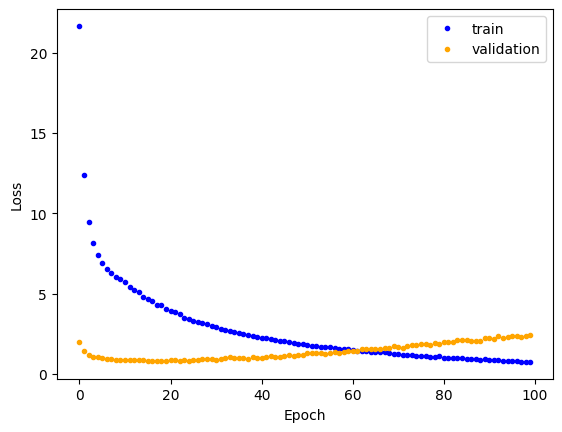

In [50]:
plt.plot(train_loss, '.', color='b', label='train')
plt.plot(validation_loss, '.', color='orange', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

#### Saving a model

After finish training a model, we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [51]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.0228,  0.0495, -0.0092,  ..., -0.0107,  0.0162, -0.0556],
        [-0.0241, -0.0405, -0.0127,  ..., -0.0220,  0.0260,  0.0146],
        [-0.0025,  0.0525,  0.0114,  ...,  0.0154, -0.0088, -0.0558],
        ...,
        [ 0.0237,  0.0029,  0.0311,  ...,  0.0210,  0.0156, -0.0009],
        [ 0.0011, -0.0074,  0.0003,  ..., -0.0197, -0.0191, -0.0008],
        [ 0.0123, -0.0002,  0.0131,  ..., -0.0298,  0.0183, -0.0470]],
       device='cuda:0')), ('linear1.bias', tensor([ 0.0214, -0.0838,  0.0763,  0.0766, -0.0935,  0.0584,  0.0659,  0.0864,
         0.0431, -0.0474,  0.0400, -0.0292, -0.0923, -0.0505,  0.0400,  0.0650,
        -0.0571, -0.0618, -0.0702,  0.0852, -0.0559, -0.0819,  0.0585,  0.0555,
         0.0772, -0.0801, -0.0583, -0.0327,  0.0287,  0.0635,  0.1087,  0.0613,
        -0.1079,  0.0778, -0.0748,  0.1095, -0.0846, -0.1334,  0.0539, -0.0456,
        -0.0874,  0.0558,  0.0816,  0.1130, -0.0192,  0.1132, -0.0983, -0.0625,
        -0.

To save the state dictionary, we can use `torch.save`:


In [52]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

To load a model from a state dict, we use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [53]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=1024, num_hidden=512, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("\nOriginal model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())


Original model
 OrderedDict([('linear1.weight', tensor([[-0.0228,  0.0495, -0.0092,  ..., -0.0107,  0.0162, -0.0556],
        [-0.0241, -0.0405, -0.0127,  ..., -0.0220,  0.0260,  0.0146],
        [-0.0025,  0.0525,  0.0114,  ...,  0.0154, -0.0088, -0.0558],
        ...,
        [ 0.0237,  0.0029,  0.0311,  ...,  0.0210,  0.0156, -0.0009],
        [ 0.0011, -0.0074,  0.0003,  ..., -0.0197, -0.0191, -0.0008],
        [ 0.0123, -0.0002,  0.0131,  ..., -0.0298,  0.0183, -0.0470]],
       device='cuda:0')), ('linear1.bias', tensor([ 0.0214, -0.0838,  0.0763,  0.0766, -0.0935,  0.0584,  0.0659,  0.0864,
         0.0431, -0.0474,  0.0400, -0.0292, -0.0923, -0.0505,  0.0400,  0.0650,
        -0.0571, -0.0618, -0.0702,  0.0852, -0.0559, -0.0819,  0.0585,  0.0555,
         0.0772, -0.0801, -0.0583, -0.0327,  0.0287,  0.0635,  0.1087,  0.0613,
        -0.1079,  0.0778, -0.0748,  0.1095, -0.0846, -0.1334,  0.0539, -0.0456,
        -0.0874,  0.0558,  0.0816,  0.1130, -0.0192,  0.1132, -0.0983, -0.

<ipython-input-53-93e19dba3731>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("our_model.tar")


A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

### Evaluation

모델 학습이 모두 끝난 후, 평가를 test set을 이용해서 진행한다.

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [54]:
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

평가를 위해서 accuracy를 우선 계산해본다.

그리고 모델을 평가할 때, 추론을 수행할 때는 gradient 계산이 필요 없으므로 `with torch.no_grad(): ...` 문을 사용해주는 것이 좋다.


As metric, we will use accuracy which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.

When evaluating the model, we don't need to keep track of the computation graph as we don't intend to calculate the gradients. This reduces the required memory and speed up the model. In PyTorch, we can deactivate the computation graph using `with torch.no_grad(): ...`. Remember to additionally set the model to eval mode.

In [55]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    all_predictions = []
    all_true_labels = []
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)

            # preds is of shape [Batch size, 1]
            preds = preds.squeeze(dim=1) # remove the last dimension of preds to match the dimension with answers
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            all_predictions.extend(pred_labels.tolist())
            all_true_labels.extend(data_labels.long().tolist())

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print("All True")
    print(all_true_labels)
    print("All predictions:")
    print(all_predictions)
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

    return all_true_labels, all_predictions

#### sigmoid
------

[sigmoid](https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98)는 S자 곡선을 그리는 함수를 의미하며, 대체로 모든 실수 영역에서 [0,1] 또는 [-1,1] 영역의 값을 출력한다.

대표적인 sigmoid 함수로는 로지스틱 함수가 있다.

$f(x) = \frac{1}{ 1 + e^{-1} }$

In [56]:
y_true, y_pred = eval_model(model, test_data_loader)

All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

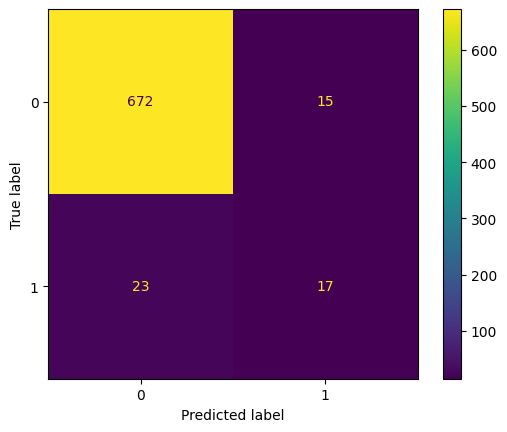

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_true, y_pred, labels=(0,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(0,1))
disp.plot()

## Multi-layer 모델
-----

이번에는 layer 개수가 더 많은 모델을 만들어 보자.

In [58]:
class Classifier2(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # 네트워크를 구성하는 위한 기반이 되는 layer들을 정의한다.
        self.linear1 = nn.Linear(num_inputs, num_hidden*2)
        self.linear2 = nn.Linear(num_hidden*2, num_hidden)
        self.linear3 = nn.Linear(num_hidden, num_hidden)
        self.linear4 = nn.Linear(num_hidden, num_outputs)
        self.act_fn = nn.Tanh()

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)

        x = self.linear2(x)
        x = self.act_fn(x)

        x = self.linear3(x)
        x = self.act_fn(x)

        x = self.linear4(x)

        return x

In [59]:
model2 = Classifier2(num_inputs=1024, num_hidden=64, num_outputs=1)

In [60]:
model2.to(device)

Classifier2(
  (linear1): Linear(in_features=1024, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=1, bias=True)
  (act_fn): Tanh()
)

In [61]:
total_params = sum(p.numel() for p in model2.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 143681


In [62]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

In [63]:
train_loss, validation_loss = train_model(model2, optimizer, train_loader, loss_module)

  2%|▏         | 2/100 [00:00<00:15,  6.31it/s]

Epoch: 000, Training Loss: 11.8523, Validation Loss: 1.1586


  7%|▋         | 7/100 [00:01<00:13,  6.85it/s]

Epoch: 005, Training Loss: 4.4080, Validation Loss: 0.7452


 12%|█▏        | 12/100 [00:01<00:13,  6.63it/s]

Epoch: 010, Training Loss: 1.7670, Validation Loss: 1.0496


 17%|█▋        | 17/100 [00:02<00:15,  5.42it/s]

Epoch: 015, Training Loss: 0.9175, Validation Loss: 1.4045


 21%|██        | 21/100 [00:03<00:15,  5.26it/s]

Epoch: 020, Training Loss: 0.6590, Validation Loss: 1.5612


 26%|██▌       | 26/100 [00:04<00:14,  5.00it/s]

Epoch: 025, Training Loss: 0.5835, Validation Loss: 1.5213


 32%|███▏      | 32/100 [00:05<00:10,  6.24it/s]

Epoch: 030, Training Loss: 0.4499, Validation Loss: 1.6204


 37%|███▋      | 37/100 [00:06<00:09,  6.66it/s]

Epoch: 035, Training Loss: 0.3573, Validation Loss: 1.6984


 42%|████▏     | 42/100 [00:07<00:08,  6.82it/s]

Epoch: 040, Training Loss: 0.3587, Validation Loss: 1.9429


 47%|████▋     | 47/100 [00:07<00:07,  6.87it/s]

Epoch: 045, Training Loss: 0.3167, Validation Loss: 1.8091


 52%|█████▏    | 52/100 [00:08<00:07,  6.79it/s]

Epoch: 050, Training Loss: 0.2687, Validation Loss: 1.7344


 57%|█████▋    | 57/100 [00:09<00:06,  6.75it/s]

Epoch: 055, Training Loss: 0.3080, Validation Loss: 1.8337


 62%|██████▏   | 62/100 [00:09<00:05,  6.78it/s]

Epoch: 060, Training Loss: 0.2423, Validation Loss: 1.7209


 67%|██████▋   | 67/100 [00:10<00:04,  6.84it/s]

Epoch: 065, Training Loss: 0.1998, Validation Loss: 1.8356


 72%|███████▏  | 72/100 [00:11<00:04,  6.81it/s]

Epoch: 070, Training Loss: 0.1398, Validation Loss: 2.0853


 77%|███████▋  | 77/100 [00:12<00:03,  6.45it/s]

Epoch: 075, Training Loss: 0.1179, Validation Loss: 2.1566


 82%|████████▏ | 82/100 [00:12<00:02,  6.77it/s]

Epoch: 080, Training Loss: 0.1253, Validation Loss: 2.3763


 87%|████████▋ | 87/100 [00:13<00:01,  6.87it/s]

Epoch: 085, Training Loss: 0.1198, Validation Loss: 2.3544


 92%|█████████▏| 92/100 [00:14<00:01,  6.77it/s]

Epoch: 090, Training Loss: 0.1166, Validation Loss: 2.3753


 96%|█████████▌| 96/100 [00:15<00:00,  6.20it/s]

Epoch: 095, Training Loss: 0.1167, Validation Loss: 2.5046


100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


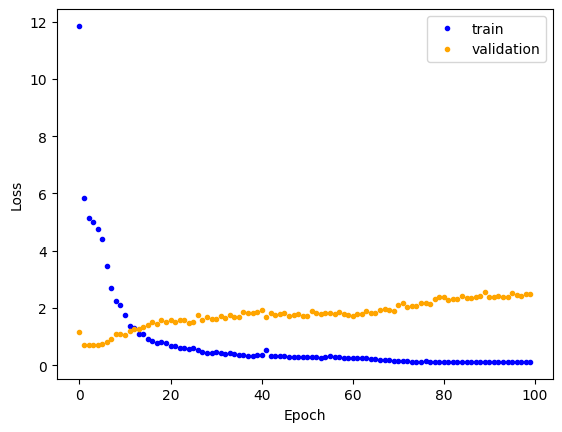

In [64]:
plt.plot(train_loss, '.', color='b', label='train')
plt.plot(validation_loss, '.', color='orange', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [65]:
y_true, y_pred = eval_model(model2, test_data_loader)

All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Drawing confusion matrix

Visualize how predictions and true labels are consistent.

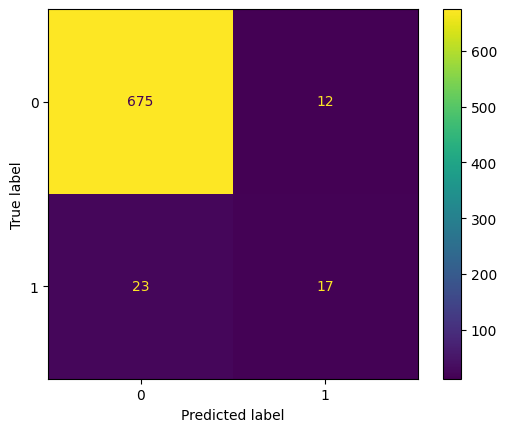

In [66]:
cm = confusion_matrix(y_true, y_pred, labels=(0,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(0,1))
disp.plot()

In [67]:
state_dict = model2.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.0923, -0.0435, -0.0681,  ..., -0.0060,  0.0489,  0.0783],
        [-0.0369, -0.0097, -0.0314,  ...,  0.1236, -0.0338, -0.0410],
        [-0.0681, -0.0804, -0.0695,  ...,  0.0031,  0.0410,  0.0375],
        ...,
        [-0.0114,  0.0243, -0.0134,  ...,  0.0909, -0.0525,  0.0052],
        [-0.0403, -0.0095, -0.0492,  ...,  0.0515, -0.0031,  0.0334],
        [-0.0356, -0.0237, -0.0172,  ...,  0.0996, -0.0210, -0.0024]],
       device='cuda:0')), ('linear1.bias', tensor([-0.0788,  0.0205, -0.0763, -0.0116,  0.0692,  0.0656,  0.0401,  0.0675,
        -0.0078,  0.0253, -0.0325,  0.0515, -0.0054,  0.0116, -0.0047, -0.0568,
         0.0969, -0.0245, -0.0431, -0.0027,  0.0292,  0.0804,  0.0085, -0.0863,
        -0.0238,  0.0111, -0.0531,  0.0257, -0.0731, -0.0549, -0.0109,  0.0007,
         0.0390,  0.1035, -0.0396,  0.0129, -0.0534, -0.0853,  0.0919, -0.0958,
         0.0186,  0.0967,  0.0715,  0.0883, -0.0593,  0.0888,  0.0851, -0.0629,
        -0.

## Adding dropout to prevent overfitting

--------


모델의 overfitting을 막기 위해서 각 노드사이의 연결을 확률적으로 랜덤하게 줄이는 것을 **dropout layer**라고 부른다.

매번 forward 계산시, 확률적($p$)으로 다른 연결들, output들이 0으로 치환된다.

학습이 종료된 뒤 추론 시에는 dropout을 고려하지 않고, 모든 연결을 사용해서 추론을 진행한다.
즉, 학습때 사용된 연결의 개수와 차이가 나기 때문에 이를 보정하기 위해서, $\frac{1}{1-p}$ 값을 weight로 주어서 추론을 하게 된다.


<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkNiGB%2FbtqFvHg40yl%2FB0IaL5Z566T10GAASJeC40%2Fimg.png" width="600"/>

In [68]:
class Classifier3(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(Classifier3, self).__init__()
        # 네트워크를 구성하는 위한 기반이 되는 layer들을 정의한다.
        self.linear1 = nn.Linear(num_inputs, num_hidden*2)
        self.linear2 = nn.Linear(num_hidden*2, num_hidden)
        self.linear3 = nn.Linear(num_hidden, num_hidden)
        self.linear4 = nn.Linear(num_hidden, num_outputs)

        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.5)
        self.dropout3 = nn.Dropout(p=0.5)

        self.act_fn = nn.Tanh()

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.dropout1(x)

        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.dropout2(x)

        x = self.linear3(x)
        x = self.act_fn(x)
        x = self.dropout3(x)

        x = self.linear4(x)

        return x

In [69]:
model3 = Classifier3(num_inputs=1024, num_hidden=64, num_outputs=1)

In [70]:
model3.to(device)

Classifier3(
  (linear1): Linear(in_features=1024, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (act_fn): Tanh()
)

In [71]:
total_params = sum(p.numel() for p in model3.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 143681


In [72]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)

In [73]:
train_loss, validation_loss = train_model(model3, optimizer, train_loader, loss_module)

  2%|▏         | 2/100 [00:00<00:17,  5.62it/s]

Epoch: 000, Training Loss: 9.2751, Validation Loss: 1.1417


  7%|▋         | 7/100 [00:01<00:14,  6.31it/s]

Epoch: 005, Training Loss: 5.3898, Validation Loss: 0.7029


 12%|█▏        | 12/100 [00:01<00:13,  6.44it/s]

Epoch: 010, Training Loss: 4.3991, Validation Loss: 0.8308


 17%|█▋        | 17/100 [00:02<00:12,  6.48it/s]

Epoch: 015, Training Loss: 3.4080, Validation Loss: 0.8159


 22%|██▏       | 22/100 [00:03<00:12,  6.38it/s]

Epoch: 020, Training Loss: 2.9342, Validation Loss: 0.9414


 27%|██▋       | 27/100 [00:04<00:11,  6.45it/s]

Epoch: 025, Training Loss: 2.4239, Validation Loss: 0.9877


 32%|███▏      | 32/100 [00:05<00:10,  6.47it/s]

Epoch: 030, Training Loss: 2.7620, Validation Loss: 0.9570


 37%|███▋      | 37/100 [00:05<00:10,  6.21it/s]

Epoch: 035, Training Loss: 1.7846, Validation Loss: 1.1351


 42%|████▏     | 42/100 [00:06<00:09,  6.27it/s]

Epoch: 040, Training Loss: 1.9458, Validation Loss: 1.1715


 47%|████▋     | 47/100 [00:07<00:08,  6.31it/s]

Epoch: 045, Training Loss: 1.7821, Validation Loss: 1.0501


 52%|█████▏    | 52/100 [00:08<00:07,  6.45it/s]

Epoch: 050, Training Loss: 1.7004, Validation Loss: 1.1834


 57%|█████▋    | 57/100 [00:09<00:08,  5.28it/s]

Epoch: 055, Training Loss: 1.7661, Validation Loss: 1.1334


 61%|██████    | 61/100 [00:09<00:08,  4.81it/s]

Epoch: 060, Training Loss: 1.6649, Validation Loss: 1.1287


 66%|██████▌   | 66/100 [00:11<00:07,  4.62it/s]

Epoch: 065, Training Loss: 1.4008, Validation Loss: 1.2765


 72%|███████▏  | 72/100 [00:12<00:04,  5.89it/s]

Epoch: 070, Training Loss: 1.6578, Validation Loss: 1.3634


 77%|███████▋  | 77/100 [00:12<00:03,  6.32it/s]

Epoch: 075, Training Loss: 1.3730, Validation Loss: 1.3619


 82%|████████▏ | 82/100 [00:13<00:02,  6.39it/s]

Epoch: 080, Training Loss: 1.4875, Validation Loss: 1.2612


 87%|████████▋ | 87/100 [00:14<00:02,  6.31it/s]

Epoch: 085, Training Loss: 1.4930, Validation Loss: 1.3772


 92%|█████████▏| 92/100 [00:15<00:01,  6.34it/s]

Epoch: 090, Training Loss: 1.3785, Validation Loss: 1.2807


 97%|█████████▋| 97/100 [00:16<00:00,  6.33it/s]

Epoch: 095, Training Loss: 1.5307, Validation Loss: 1.4636


100%|██████████| 100/100 [00:16<00:00,  6.05it/s]


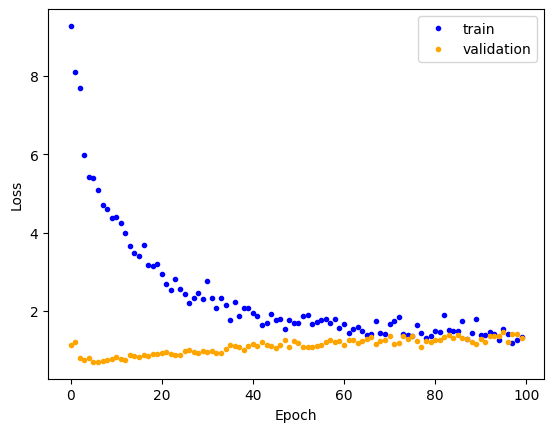

In [74]:
plt.plot(train_loss, '.', color='b', label='train')
plt.plot(validation_loss, '.', color='orange', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

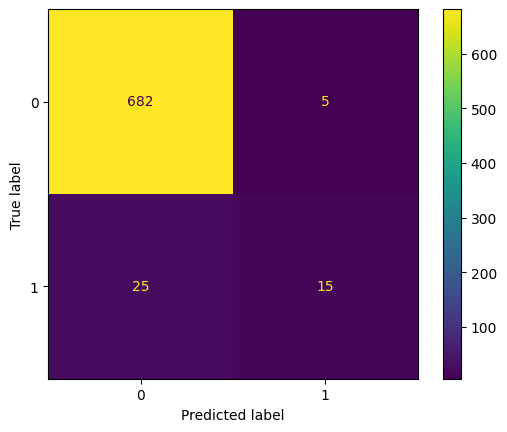

In [75]:
y_true, y_pred = eval_model(model3, test_data_loader)
cm = confusion_matrix(y_true, y_pred, labels=(0,1))
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(0,1))
disp.plot()

# Homework:

1) Tox21의 다른 타겟의 독성을 선택하여 레이어 개수가 3, 5, 7, 숨겨진 차원의 크기가 128, 256, 1024인 MLP 모델을 훈련시켜 보라.

2) 입력 fingerprint의 차원을 128이나 256으로 줄였을 때, 성능의 차이가 생기는지 확인해보라.


In [77]:
# Define models with varying layers and hidden dimensions
class MLPClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, num_layers=3):
        super(MLPClassifier, self).__init__()

        layers = []

        # First layer from input to first hidden layer
        layers.append(nn.Linear(num_inputs, num_hidden))
        layers.append(nn.Tanh())
        layers.append(nn.Dropout(p=0.5))

        # Additional intermediate hidden layers
        for _ in range(num_layers - 2):
            layers.append(nn.Linear(num_hidden, num_hidden))
            layers.append(nn.Tanh())
            layers.append(nn.Dropout(p=0.5))

        # Final layer from last hidden layer to output
        layers.append(nn.Linear(num_hidden, num_outputs))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


# Experiment with different configurations
hidden_dims = [128, 256, 1024]
layer_counts = [3, 5, 7]

# Track results for each model
results = []

for hidden_dim in hidden_dims:
    for num_layers in layer_counts:
        print(f"\nTraining MLP with {num_layers} layers and hidden dimension {hidden_dim}...\n")
        model = MLPClassifier(num_inputs=1024, num_hidden=hidden_dim, num_outputs=1, num_layers=num_layers)
        model.to(device)

        # Train and evaluate
        train_loss, validation_loss = train_model(model, optimizer, train_loader, loss_module)
        y_true, y_pred = eval_model(model, test_data_loader)

        # Calculate accuracy and other metrics
        accuracy = (torch.tensor(y_true) == torch.tensor(y_pred)).float().mean().item() * 100
        results.append({'layers': num_layers, 'hidden_dim': hidden_dim, 'accuracy': accuracy})

# Print or visualize the results for comparison
for result in results:
    print(f"Layers: {result['layers']}, Hidden Dim: {result['hidden_dim']}, Accuracy: {result['accuracy']:.2f}%")



Training MLP with 3 layers and hidden dimension 128...



  1%|          | 1/100 [00:00<00:22,  4.40it/s]

Epoch: 000, Training Loss: 31.9357, Validation Loss: 4.1612


  6%|▌         | 6/100 [00:01<00:19,  4.76it/s]

Epoch: 005, Training Loss: 31.9166, Validation Loss: 4.1615


 12%|█▏        | 12/100 [00:02<00:19,  4.58it/s]

Epoch: 010, Training Loss: 31.8966, Validation Loss: 4.1613


 17%|█▋        | 17/100 [00:03<00:12,  6.72it/s]

Epoch: 015, Training Loss: 31.9145, Validation Loss: 4.1608


 22%|██▏       | 22/100 [00:04<00:10,  7.56it/s]

Epoch: 020, Training Loss: 31.9281, Validation Loss: 4.1612


 27%|██▋       | 27/100 [00:04<00:09,  7.44it/s]

Epoch: 025, Training Loss: 31.9111, Validation Loss: 4.1606


 32%|███▏      | 32/100 [00:05<00:09,  7.33it/s]

Epoch: 030, Training Loss: 31.9614, Validation Loss: 4.1618


 37%|███▋      | 37/100 [00:06<00:08,  7.63it/s]

Epoch: 035, Training Loss: 31.9160, Validation Loss: 4.1608


 42%|████▏     | 42/100 [00:07<00:09,  6.02it/s]

Epoch: 040, Training Loss: 31.9425, Validation Loss: 4.1601


 47%|████▋     | 47/100 [00:07<00:09,  5.64it/s]

Epoch: 045, Training Loss: 31.9387, Validation Loss: 4.1614


 52%|█████▏    | 52/100 [00:08<00:08,  5.56it/s]

Epoch: 050, Training Loss: 31.9120, Validation Loss: 4.1599


 57%|█████▋    | 57/100 [00:09<00:06,  6.49it/s]

Epoch: 055, Training Loss: 31.9271, Validation Loss: 4.1601


 62%|██████▏   | 62/100 [00:10<00:05,  7.36it/s]

Epoch: 060, Training Loss: 31.9194, Validation Loss: 4.1615


 67%|██████▋   | 67/100 [00:10<00:04,  7.33it/s]

Epoch: 065, Training Loss: 31.9302, Validation Loss: 4.1606


 72%|███████▏  | 72/100 [00:11<00:03,  7.60it/s]

Epoch: 070, Training Loss: 31.9190, Validation Loss: 4.1612


 77%|███████▋  | 77/100 [00:12<00:03,  7.51it/s]

Epoch: 075, Training Loss: 31.9025, Validation Loss: 4.1605


 82%|████████▏ | 82/100 [00:12<00:02,  7.61it/s]

Epoch: 080, Training Loss: 31.9207, Validation Loss: 4.1613


 87%|████████▋ | 87/100 [00:13<00:01,  7.68it/s]

Epoch: 085, Training Loss: 31.9285, Validation Loss: 4.1607


 92%|█████████▏| 92/100 [00:14<00:01,  7.65it/s]

Epoch: 090, Training Loss: 31.9210, Validation Loss: 4.1601


 97%|█████████▋| 97/100 [00:14<00:00,  7.55it/s]

Epoch: 095, Training Loss: 31.9244, Validation Loss: 4.1613


100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:14,  6.85it/s]

Epoch: 000, Training Loss: 31.0876, Validation Loss: 4.0511


  7%|▋         | 7/100 [00:01<00:14,  6.49it/s]

Epoch: 005, Training Loss: 31.0564, Validation Loss: 4.0517


 12%|█▏        | 12/100 [00:01<00:13,  6.48it/s]

Epoch: 010, Training Loss: 31.0557, Validation Loss: 4.0523


 17%|█▋        | 17/100 [00:02<00:12,  6.42it/s]

Epoch: 015, Training Loss: 31.0642, Validation Loss: 4.0520


 22%|██▏       | 22/100 [00:03<00:12,  6.40it/s]

Epoch: 020, Training Loss: 31.1035, Validation Loss: 4.0514


 26%|██▌       | 26/100 [00:04<00:12,  6.12it/s]

Epoch: 025, Training Loss: 31.0629, Validation Loss: 4.0517


 32%|███▏      | 32/100 [00:05<00:13,  5.14it/s]

Epoch: 030, Training Loss: 31.0399, Validation Loss: 4.0512


 36%|███▌      | 36/100 [00:06<00:14,  4.29it/s]

Epoch: 035, Training Loss: 31.0621, Validation Loss: 4.0520


 41%|████      | 41/100 [00:07<00:12,  4.67it/s]

Epoch: 040, Training Loss: 31.0956, Validation Loss: 4.0517


 46%|████▌     | 46/100 [00:08<00:12,  4.35it/s]

Epoch: 045, Training Loss: 31.0779, Validation Loss: 4.0515


 51%|█████     | 51/100 [00:09<00:11,  4.44it/s]

Epoch: 050, Training Loss: 31.0440, Validation Loss: 4.0525


 57%|█████▋    | 57/100 [00:10<00:07,  5.97it/s]

Epoch: 055, Training Loss: 31.0878, Validation Loss: 4.0518


 62%|██████▏   | 62/100 [00:11<00:05,  6.38it/s]

Epoch: 060, Training Loss: 31.0694, Validation Loss: 4.0517


 67%|██████▋   | 67/100 [00:12<00:05,  6.41it/s]

Epoch: 065, Training Loss: 31.0684, Validation Loss: 4.0516


 72%|███████▏  | 72/100 [00:12<00:04,  6.56it/s]

Epoch: 070, Training Loss: 31.0879, Validation Loss: 4.0514


 77%|███████▋  | 77/100 [00:13<00:03,  6.51it/s]

Epoch: 075, Training Loss: 31.0515, Validation Loss: 4.0524


 82%|████████▏ | 82/100 [00:14<00:02,  6.42it/s]

Epoch: 080, Training Loss: 31.0470, Validation Loss: 4.0519


 87%|████████▋ | 87/100 [00:15<00:02,  6.45it/s]

Epoch: 085, Training Loss: 31.0745, Validation Loss: 4.0519


 92%|█████████▏| 92/100 [00:15<00:01,  6.62it/s]

Epoch: 090, Training Loss: 31.0472, Validation Loss: 4.0517


 97%|█████████▋| 97/100 [00:16<00:00,  6.49it/s]

Epoch: 095, Training Loss: 31.0632, Validation Loss: 4.0521


100%|██████████| 100/100 [00:17<00:00,  5.80it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:18,  5.39it/s]

Epoch: 000, Training Loss: 32.2873, Validation Loss: 4.2099


  7%|▋         | 7/100 [00:01<00:16,  5.66it/s]

Epoch: 005, Training Loss: 32.3316, Validation Loss: 4.2101


 11%|█         | 11/100 [00:02<00:19,  4.66it/s]

Epoch: 010, Training Loss: 32.3160, Validation Loss: 4.2100


 16%|█▌        | 16/100 [00:03<00:20,  4.12it/s]

Epoch: 015, Training Loss: 32.3116, Validation Loss: 4.2100


 22%|██▏       | 22/100 [00:04<00:16,  4.64it/s]

Epoch: 020, Training Loss: 32.3134, Validation Loss: 4.2103


 27%|██▋       | 27/100 [00:05<00:13,  5.56it/s]

Epoch: 025, Training Loss: 32.3012, Validation Loss: 4.2101


 32%|███▏      | 32/100 [00:06<00:11,  5.77it/s]

Epoch: 030, Training Loss: 32.2971, Validation Loss: 4.2099


 37%|███▋      | 37/100 [00:07<00:10,  5.74it/s]

Epoch: 035, Training Loss: 32.3214, Validation Loss: 4.2100


 42%|████▏     | 42/100 [00:08<00:10,  5.69it/s]

Epoch: 040, Training Loss: 32.3154, Validation Loss: 4.2101


 47%|████▋     | 47/100 [00:09<00:09,  5.61it/s]

Epoch: 045, Training Loss: 32.2720, Validation Loss: 4.2101


 52%|█████▏    | 52/100 [00:09<00:08,  5.76it/s]

Epoch: 050, Training Loss: 32.2939, Validation Loss: 4.2102


 57%|█████▋    | 57/100 [00:10<00:07,  5.72it/s]

Epoch: 055, Training Loss: 32.3152, Validation Loss: 4.2100


 62%|██████▏   | 62/100 [00:11<00:06,  5.76it/s]

Epoch: 060, Training Loss: 32.3268, Validation Loss: 4.2097


 67%|██████▋   | 67/100 [00:12<00:05,  5.68it/s]

Epoch: 065, Training Loss: 32.3241, Validation Loss: 4.2100


 72%|███████▏  | 72/100 [00:13<00:04,  5.67it/s]

Epoch: 070, Training Loss: 32.2764, Validation Loss: 4.2102


 77%|███████▋  | 77/100 [00:14<00:03,  5.78it/s]

Epoch: 075, Training Loss: 32.2975, Validation Loss: 4.2102


 81%|████████  | 81/100 [00:15<00:04,  4.66it/s]

Epoch: 080, Training Loss: 32.3030, Validation Loss: 4.2096


 86%|████████▌ | 86/100 [00:16<00:03,  4.18it/s]

Epoch: 085, Training Loss: 32.2738, Validation Loss: 4.2101


 92%|█████████▏| 92/100 [00:17<00:01,  4.60it/s]

Epoch: 090, Training Loss: 32.2751, Validation Loss: 4.2096


 97%|█████████▋| 97/100 [00:18<00:00,  5.53it/s]

Epoch: 095, Training Loss: 32.3274, Validation Loss: 4.2103


100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:12,  7.68it/s]

Epoch: 000, Training Loss: 30.9741, Validation Loss: 4.0348


  7%|▋         | 7/100 [00:00<00:12,  7.45it/s]

Epoch: 005, Training Loss: 30.9650, Validation Loss: 4.0347


 12%|█▏        | 12/100 [00:01<00:11,  7.58it/s]

Epoch: 010, Training Loss: 30.9863, Validation Loss: 4.0344


 17%|█▋        | 17/100 [00:02<00:10,  7.72it/s]

Epoch: 015, Training Loss: 30.9883, Validation Loss: 4.0351


 22%|██▏       | 22/100 [00:02<00:10,  7.47it/s]

Epoch: 020, Training Loss: 30.9659, Validation Loss: 4.0334


 27%|██▋       | 27/100 [00:03<00:09,  7.44it/s]

Epoch: 025, Training Loss: 31.0000, Validation Loss: 4.0354


 32%|███▏      | 32/100 [00:04<00:08,  7.78it/s]

Epoch: 030, Training Loss: 30.9797, Validation Loss: 4.0351


 37%|███▋      | 37/100 [00:04<00:08,  7.58it/s]

Epoch: 035, Training Loss: 30.9997, Validation Loss: 4.0345


 42%|████▏     | 42/100 [00:05<00:07,  7.45it/s]

Epoch: 040, Training Loss: 30.9716, Validation Loss: 4.0346


 47%|████▋     | 47/100 [00:06<00:06,  7.65it/s]

Epoch: 045, Training Loss: 30.9932, Validation Loss: 4.0336


 52%|█████▏    | 52/100 [00:06<00:06,  7.57it/s]

Epoch: 050, Training Loss: 30.9834, Validation Loss: 4.0348


 57%|█████▋    | 57/100 [00:07<00:05,  7.64it/s]

Epoch: 055, Training Loss: 30.9651, Validation Loss: 4.0339


 62%|██████▏   | 62/100 [00:08<00:05,  6.71it/s]

Epoch: 060, Training Loss: 30.9779, Validation Loss: 4.0343


 67%|██████▋   | 67/100 [00:09<00:05,  6.11it/s]

Epoch: 065, Training Loss: 30.9823, Validation Loss: 4.0342


 72%|███████▏  | 72/100 [00:10<00:04,  5.64it/s]

Epoch: 070, Training Loss: 31.0258, Validation Loss: 4.0362


 77%|███████▋  | 77/100 [00:10<00:04,  5.52it/s]

Epoch: 075, Training Loss: 30.9539, Validation Loss: 4.0345


 82%|████████▏ | 82/100 [00:11<00:02,  6.85it/s]

Epoch: 080, Training Loss: 31.0007, Validation Loss: 4.0354


 87%|████████▋ | 87/100 [00:12<00:01,  7.60it/s]

Epoch: 085, Training Loss: 30.9857, Validation Loss: 4.0339


 92%|█████████▏| 92/100 [00:12<00:01,  7.54it/s]

Epoch: 090, Training Loss: 30.9519, Validation Loss: 4.0348


 97%|█████████▋| 97/100 [00:13<00:00,  7.35it/s]

Epoch: 095, Training Loss: 30.9846, Validation Loss: 4.0351


100%|██████████| 100/100 [00:14<00:00,  7.11it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:14,  6.68it/s]

Epoch: 000, Training Loss: 31.3703, Validation Loss: 4.0938


  7%|▋         | 7/100 [00:01<00:14,  6.37it/s]

Epoch: 005, Training Loss: 31.3952, Validation Loss: 4.0940


 12%|█▏        | 12/100 [00:01<00:13,  6.37it/s]

Epoch: 010, Training Loss: 31.3625, Validation Loss: 4.0939


 17%|█▋        | 17/100 [00:02<00:12,  6.42it/s]

Epoch: 015, Training Loss: 31.3928, Validation Loss: 4.0940


 22%|██▏       | 22/100 [00:03<00:12,  6.44it/s]

Epoch: 020, Training Loss: 31.3931, Validation Loss: 4.0938


 27%|██▋       | 27/100 [00:04<00:11,  6.44it/s]

Epoch: 025, Training Loss: 31.3474, Validation Loss: 4.0937


 32%|███▏      | 32/100 [00:05<00:10,  6.43it/s]

Epoch: 030, Training Loss: 31.3604, Validation Loss: 4.0941


 37%|███▋      | 37/100 [00:05<00:10,  6.21it/s]

Epoch: 035, Training Loss: 31.3584, Validation Loss: 4.0940


 42%|████▏     | 42/100 [00:06<00:09,  6.35it/s]

Epoch: 040, Training Loss: 31.3496, Validation Loss: 4.0938


 46%|████▌     | 46/100 [00:07<00:09,  5.77it/s]

Epoch: 045, Training Loss: 31.3546, Validation Loss: 4.0940


 51%|█████     | 51/100 [00:08<00:09,  5.17it/s]

Epoch: 050, Training Loss: 31.3616, Validation Loss: 4.0936


 56%|█████▌    | 56/100 [00:09<00:09,  4.64it/s]

Epoch: 055, Training Loss: 31.3682, Validation Loss: 4.0941


 62%|██████▏   | 62/100 [00:10<00:06,  5.78it/s]

Epoch: 060, Training Loss: 31.3759, Validation Loss: 4.0935


 67%|██████▋   | 67/100 [00:11<00:05,  6.31it/s]

Epoch: 065, Training Loss: 31.3520, Validation Loss: 4.0936


 72%|███████▏  | 72/100 [00:12<00:04,  6.30it/s]

Epoch: 070, Training Loss: 31.3900, Validation Loss: 4.0933


 77%|███████▋  | 77/100 [00:12<00:03,  6.38it/s]

Epoch: 075, Training Loss: 31.3694, Validation Loss: 4.0941


 82%|████████▏ | 82/100 [00:13<00:02,  6.30it/s]

Epoch: 080, Training Loss: 31.3836, Validation Loss: 4.0940


 87%|████████▋ | 87/100 [00:14<00:02,  6.40it/s]

Epoch: 085, Training Loss: 31.3592, Validation Loss: 4.0937


 92%|█████████▏| 92/100 [00:15<00:01,  6.38it/s]

Epoch: 090, Training Loss: 31.3932, Validation Loss: 4.0945


 97%|█████████▋| 97/100 [00:15<00:00,  6.46it/s]

Epoch: 095, Training Loss: 31.3976, Validation Loss: 4.0935


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:18,  5.39it/s]

Epoch: 000, Training Loss: 31.6410, Validation Loss: 4.1229


  7%|▋         | 7/100 [00:01<00:16,  5.55it/s]

Epoch: 005, Training Loss: 31.6059, Validation Loss: 4.1228


 12%|█▏        | 12/100 [00:02<00:15,  5.63it/s]

Epoch: 010, Training Loss: 31.6148, Validation Loss: 4.1229


 17%|█▋        | 17/100 [00:03<00:14,  5.56it/s]

Epoch: 015, Training Loss: 31.6122, Validation Loss: 4.1229


 21%|██        | 21/100 [00:03<00:16,  4.84it/s]

Epoch: 020, Training Loss: 31.6055, Validation Loss: 4.1229


 26%|██▌       | 26/100 [00:05<00:17,  4.31it/s]

Epoch: 025, Training Loss: 31.6054, Validation Loss: 4.1229


 31%|███       | 31/100 [00:06<00:16,  4.08it/s]

Epoch: 030, Training Loss: 31.6131, Validation Loss: 4.1227


 37%|███▋      | 37/100 [00:07<00:11,  5.32it/s]

Epoch: 035, Training Loss: 31.6029, Validation Loss: 4.1228


 42%|████▏     | 42/100 [00:08<00:10,  5.51it/s]

Epoch: 040, Training Loss: 31.5854, Validation Loss: 4.1227


 47%|████▋     | 47/100 [00:09<00:09,  5.55it/s]

Epoch: 045, Training Loss: 31.6237, Validation Loss: 4.1225


 52%|█████▏    | 52/100 [00:10<00:08,  5.58it/s]

Epoch: 050, Training Loss: 31.5834, Validation Loss: 4.1228


 57%|█████▋    | 57/100 [00:11<00:07,  5.51it/s]

Epoch: 055, Training Loss: 31.6316, Validation Loss: 4.1227


 62%|██████▏   | 62/100 [00:11<00:06,  5.68it/s]

Epoch: 060, Training Loss: 31.6241, Validation Loss: 4.1228


 67%|██████▋   | 67/100 [00:12<00:05,  5.66it/s]

Epoch: 065, Training Loss: 31.6166, Validation Loss: 4.1227


 72%|███████▏  | 72/100 [00:13<00:05,  5.56it/s]

Epoch: 070, Training Loss: 31.6081, Validation Loss: 4.1226


 77%|███████▋  | 77/100 [00:14<00:04,  5.52it/s]

Epoch: 075, Training Loss: 31.6104, Validation Loss: 4.1228


 82%|████████▏ | 82/100 [00:15<00:03,  5.52it/s]

Epoch: 080, Training Loss: 31.6152, Validation Loss: 4.1229


 87%|████████▋ | 87/100 [00:16<00:02,  5.55it/s]

Epoch: 085, Training Loss: 31.5870, Validation Loss: 4.1228


 91%|█████████ | 91/100 [00:17<00:01,  4.55it/s]

Epoch: 090, Training Loss: 31.6217, Validation Loss: 4.1228


 96%|█████████▌| 96/100 [00:18<00:00,  4.13it/s]

Epoch: 095, Training Loss: 31.6106, Validation Loss: 4.1227


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:12,  7.80it/s]

Epoch: 000, Training Loss: 30.8345, Validation Loss: 4.0166


  7%|▋         | 7/100 [00:00<00:12,  7.25it/s]

Epoch: 005, Training Loss: 30.8401, Validation Loss: 4.0173


 12%|█▏        | 12/100 [00:01<00:11,  7.48it/s]

Epoch: 010, Training Loss: 30.8068, Validation Loss: 4.0164


 17%|█▋        | 17/100 [00:02<00:11,  7.54it/s]

Epoch: 015, Training Loss: 30.8288, Validation Loss: 4.0171


 22%|██▏       | 22/100 [00:02<00:10,  7.51it/s]

Epoch: 020, Training Loss: 30.7779, Validation Loss: 4.0174


 27%|██▋       | 27/100 [00:03<00:09,  7.67it/s]

Epoch: 025, Training Loss: 30.7977, Validation Loss: 4.0176


 32%|███▏      | 32/100 [00:04<00:08,  7.57it/s]

Epoch: 030, Training Loss: 30.7912, Validation Loss: 4.0159


 37%|███▋      | 37/100 [00:04<00:08,  7.43it/s]

Epoch: 035, Training Loss: 30.8012, Validation Loss: 4.0172


 42%|████▏     | 42/100 [00:05<00:07,  7.68it/s]

Epoch: 040, Training Loss: 30.7989, Validation Loss: 4.0173


 47%|████▋     | 47/100 [00:06<00:07,  7.54it/s]

Epoch: 045, Training Loss: 30.7966, Validation Loss: 4.0170


 52%|█████▏    | 52/100 [00:06<00:06,  7.34it/s]

Epoch: 050, Training Loss: 30.8130, Validation Loss: 4.0157


 57%|█████▋    | 57/100 [00:07<00:05,  7.55it/s]

Epoch: 055, Training Loss: 30.8021, Validation Loss: 4.0163


 62%|██████▏   | 62/100 [00:08<00:05,  7.59it/s]

Epoch: 060, Training Loss: 30.8027, Validation Loss: 4.0164


 67%|██████▋   | 67/100 [00:08<00:04,  7.51it/s]

Epoch: 065, Training Loss: 30.8174, Validation Loss: 4.0174


 72%|███████▏  | 72/100 [00:09<00:03,  7.58it/s]

Epoch: 070, Training Loss: 30.8243, Validation Loss: 4.0158


 77%|███████▋  | 77/100 [00:10<00:03,  6.17it/s]

Epoch: 075, Training Loss: 30.7902, Validation Loss: 4.0168


 82%|████████▏ | 82/100 [00:11<00:03,  5.74it/s]

Epoch: 080, Training Loss: 30.8198, Validation Loss: 4.0169


 87%|████████▋ | 87/100 [00:12<00:02,  5.72it/s]

Epoch: 085, Training Loss: 30.8016, Validation Loss: 4.0167


 92%|█████████▏| 92/100 [00:12<00:01,  7.13it/s]

Epoch: 090, Training Loss: 30.8262, Validation Loss: 4.0170


 97%|█████████▋| 97/100 [00:13<00:00,  7.37it/s]

Epoch: 095, Training Loss: 30.8143, Validation Loss: 4.0164


100%|██████████| 100/100 [00:13<00:00,  7.15it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:15,  6.14it/s]

Epoch: 000, Training Loss: 31.6317, Validation Loss: 4.1225


  7%|▋         | 7/100 [00:01<00:14,  6.47it/s]

Epoch: 005, Training Loss: 31.6119, Validation Loss: 4.1219


 12%|█▏        | 12/100 [00:01<00:13,  6.44it/s]

Epoch: 010, Training Loss: 31.6003, Validation Loss: 4.1222


 17%|█▋        | 17/100 [00:02<00:13,  6.33it/s]

Epoch: 015, Training Loss: 31.6196, Validation Loss: 4.1222


 22%|██▏       | 22/100 [00:03<00:12,  6.44it/s]

Epoch: 020, Training Loss: 31.6046, Validation Loss: 4.1225


 27%|██▋       | 27/100 [00:04<00:11,  6.46it/s]

Epoch: 025, Training Loss: 31.6365, Validation Loss: 4.1226


 32%|███▏      | 32/100 [00:05<00:10,  6.46it/s]

Epoch: 030, Training Loss: 31.6338, Validation Loss: 4.1227


 37%|███▋      | 37/100 [00:05<00:09,  6.38it/s]

Epoch: 035, Training Loss: 31.6298, Validation Loss: 4.1221


 42%|████▏     | 42/100 [00:06<00:08,  6.55it/s]

Epoch: 040, Training Loss: 31.6102, Validation Loss: 4.1222


 47%|████▋     | 47/100 [00:07<00:08,  6.22it/s]

Epoch: 045, Training Loss: 31.6146, Validation Loss: 4.1220


 52%|█████▏    | 52/100 [00:08<00:07,  6.22it/s]

Epoch: 050, Training Loss: 31.6193, Validation Loss: 4.1226


 57%|█████▋    | 57/100 [00:09<00:08,  5.24it/s]

Epoch: 055, Training Loss: 31.6216, Validation Loss: 4.1221


 61%|██████    | 61/100 [00:10<00:08,  4.68it/s]

Epoch: 060, Training Loss: 31.6290, Validation Loss: 4.1223


 67%|██████▋   | 67/100 [00:11<00:06,  5.00it/s]

Epoch: 065, Training Loss: 31.6096, Validation Loss: 4.1224


 72%|███████▏  | 72/100 [00:12<00:04,  6.12it/s]

Epoch: 070, Training Loss: 31.6316, Validation Loss: 4.1221


 77%|███████▋  | 77/100 [00:12<00:03,  6.30it/s]

Epoch: 075, Training Loss: 31.6054, Validation Loss: 4.1224


 82%|████████▏ | 82/100 [00:13<00:02,  6.34it/s]

Epoch: 080, Training Loss: 31.6169, Validation Loss: 4.1223


 87%|████████▋ | 87/100 [00:14<00:02,  6.45it/s]

Epoch: 085, Training Loss: 31.6260, Validation Loss: 4.1221


 92%|█████████▏| 92/100 [00:15<00:01,  6.51it/s]

Epoch: 090, Training Loss: 31.6051, Validation Loss: 4.1222


 97%|█████████▋| 97/100 [00:16<00:00,  6.34it/s]

Epoch: 095, Training Loss: 31.6037, Validation Loss: 4.1224


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:17,  5.48it/s]

Epoch: 000, Training Loss: 31.9691, Validation Loss: 4.1696


  7%|▋         | 7/100 [00:01<00:17,  5.45it/s]

Epoch: 005, Training Loss: 31.9580, Validation Loss: 4.1696


 12%|█▏        | 12/100 [00:02<00:15,  5.50it/s]

Epoch: 010, Training Loss: 31.9704, Validation Loss: 4.1697


 17%|█▋        | 17/100 [00:03<00:14,  5.69it/s]

Epoch: 015, Training Loss: 31.9736, Validation Loss: 4.1697


 22%|██▏       | 22/100 [00:03<00:13,  5.67it/s]

Epoch: 020, Training Loss: 31.9614, Validation Loss: 4.1696


 26%|██▌       | 26/100 [00:04<00:13,  5.31it/s]

Epoch: 025, Training Loss: 31.9651, Validation Loss: 4.1696


 31%|███       | 31/100 [00:05<00:15,  4.45it/s]

Epoch: 030, Training Loss: 31.9716, Validation Loss: 4.1696


 36%|███▌      | 36/100 [00:07<00:15,  4.00it/s]

Epoch: 035, Training Loss: 31.9869, Validation Loss: 4.1697


 42%|████▏     | 42/100 [00:08<00:11,  5.10it/s]

Epoch: 040, Training Loss: 31.9814, Validation Loss: 4.1697


 47%|████▋     | 47/100 [00:09<00:09,  5.52it/s]

Epoch: 045, Training Loss: 31.9903, Validation Loss: 4.1698


 52%|█████▏    | 52/100 [00:10<00:08,  5.56it/s]

Epoch: 050, Training Loss: 31.9477, Validation Loss: 4.1697


 57%|█████▋    | 57/100 [00:11<00:07,  5.64it/s]

Epoch: 055, Training Loss: 31.9741, Validation Loss: 4.1696


 62%|██████▏   | 62/100 [00:11<00:06,  5.59it/s]

Epoch: 060, Training Loss: 31.9760, Validation Loss: 4.1696


 67%|██████▋   | 67/100 [00:12<00:05,  5.50it/s]

Epoch: 065, Training Loss: 31.9703, Validation Loss: 4.1698


 72%|███████▏  | 72/100 [00:13<00:04,  5.69it/s]

Epoch: 070, Training Loss: 31.9544, Validation Loss: 4.1696


 77%|███████▋  | 77/100 [00:14<00:04,  5.65it/s]

Epoch: 075, Training Loss: 31.9572, Validation Loss: 4.1698


 82%|████████▏ | 82/100 [00:15<00:03,  5.72it/s]

Epoch: 080, Training Loss: 31.9636, Validation Loss: 4.1697


 87%|████████▋ | 87/100 [00:16<00:02,  5.68it/s]

Epoch: 085, Training Loss: 31.9720, Validation Loss: 4.1696


 92%|█████████▏| 92/100 [00:17<00:01,  5.66it/s]

Epoch: 090, Training Loss: 31.9886, Validation Loss: 4.1697


 96%|█████████▌| 96/100 [00:18<00:00,  4.76it/s]

Epoch: 095, Training Loss: 31.9690, Validation Loss: 4.1696


100%|██████████| 100/100 [00:19<00:00,  5.25it/s]

All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

1. Impact of Layer Depth:



For models with 3 layers, accuracy varied across different hidden dimensions, with smaller dimensions (128) achieving moderate performance (49.24%), and larger dimensions (256 and 1024) yielding higher accuracies (88.03% and 92.16%, respectively). This suggests that when model complexity is limited to 3 layers, increasing the hidden dimension size may provide the model with greater expressive capacity and improve performance.
In the case of 5 layers, all hidden dimensions (128, 256, and 1024) produced high accuracy scores, ranging from 89.41% to 94.50%. This indicates that a moderate increase in layer depth, combined with adequate hidden dimensions, enables the model to capture more complex relationships in the data, leading to consistently high accuracy.
However, with 7 layers, we observe a significant drop in accuracy for models with 128 and 1024 hidden dimensions, reaching very low performance (5.50% and 14.86%, respectively). The model with 256 hidden dimensions retained high accuracy (94.50%), suggesting that overly deep architectures may lead to instability, especially when hidden dimensions are too small (underfitting) or too large (overfitting).

2. Effect of Hidden Dimension Size:

Models with a hidden dimension of 128 exhibited widely varied performance across different layer depths. With 3 and 7 layers, accuracy was low, while 5 layers yielded optimal performance (94.50%). This suggests that while a smaller hidden dimension can still support high performance, it is highly sensitive to the appropriate number of layers.
For 256 hidden dimensions, accuracy was consistently high across 5 and 7 layers, reaching 93.40% and 94.50%, respectively. This suggests that 256 provides a balanced capacity, enabling the model to leverage deeper architectures without performance degradation.
For models with 1024 hidden dimensions, accuracy remained high for 3 layers (92.16%) but fluctuated for deeper layers. This indicates that excessively large hidden dimensions can introduce complexity that may lead to overfitting or instability, particularly when combined with higher layer counts (7 layers at 14.86%).

In [81]:
from rdkit.Chem import rdFingerprintGenerator

# Generating fingerprints of sizes 128, 256, and 1024
mfpgen_128 = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=128)
mfpgen_256 = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=256)
mfpgen_1024 = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
class Tox21Dataset(data.Dataset):
    def __init__(self, fpgen, target="NR-AR"):
        """
        Inputs:
            fpgen: Fingerprint generator for generating fingerprints
            target: Target toxicity feature from Tox21
        """
        super().__init__()
        self.raw_df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz')
        self.df_sub = self.raw_df[[target, "smiles"]].dropna(subset=[target]).copy()

        # Convert SMILES to fingerprints
        fp_list = []
        for smi in tqdm(self.df_sub["smiles"]):
            m = Chem.MolFromSmiles(smi)
            fp = fpgen.GetFingerprint(m)
            fp_list.append(fp.ToList())

        self.data = torch.tensor(fp_list, dtype=torch.float32)  # Convert to tensor
        self.label = torch.tensor(self.df_sub[target].values, dtype=torch.float32)  # Target label to tensor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label
# Instantiate datasets with different fingerprint dimensions
dataset_128 = Tox21Dataset(fpgen=mfpgen_128)
dataset_256 = Tox21Dataset(fpgen=mfpgen_256)
dataset_1024 = Tox21Dataset(fpgen=mfpgen_1024)

# Split datasets for training, validation, and testing
datasets = {'128': dataset_128, '256': dataset_256, '1024': dataset_1024}
results_by_fp_size = {}

for fp_size, dataset in datasets.items():
    train_dataset, validation_dataset, test_dataset = data.random_split(dataset, [train_size, validation_size, test_size])
    train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
    validation_loader = data.DataLoader(validation_dataset, batch_size=128, shuffle=True)
    test_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Experiment with each hidden layer and dimension setup as before
    for hidden_dim in [128, 256, 1024]:
        for num_layers in [3, 5, 7]:
            print(f"\nTraining with fingerprint size {fp_size}, {num_layers} layers, hidden dim {hidden_dim}...\n")
            model = MLPClassifier(num_inputs=int(fp_size), num_hidden=hidden_dim, num_outputs=1, num_layers=num_layers)
            model.to(device)

            # Use the same optimizer, loss function, and train as previously
            train_loss, validation_loss = train_model(model, optimizer, train_loader, loss_module)
            y_true, y_pred = eval_model(model, test_loader)

            # Calculate accuracy and record results
            accuracy = (torch.tensor(y_true) == torch.tensor(y_pred)).float().mean().item() * 100
            results_by_fp_size.setdefault(fp_size, []).append({
                'layers': num_layers,
                'hidden_dim': hidden_dim,
                'accuracy': accuracy
            })
# Display or visualize results
for fp_size, results in results_by_fp_size.items():
    print(f"\nResults for fingerprint size {fp_size}:\n")
    for result in results:
        print(f"Layers: {result['layers']}, Hidden Dim: {result['hidden_dim']}, Accuracy: {result['accuracy']:.2f}%")


100%|██████████| 7265/7265 [00:01<00:00, 3964.27it/s]



Training with fingerprint size 128, 3 layers, hidden dim 128...



  1%|          | 1/100 [00:00<00:15,  6.25it/s]

Epoch: 000, Training Loss: 30.4444, Validation Loss: 3.9363


  7%|▋         | 7/100 [00:01<00:13,  6.76it/s]

Epoch: 005, Training Loss: 30.4535, Validation Loss: 3.9350


 12%|█▏        | 12/100 [00:01<00:11,  7.88it/s]

Epoch: 010, Training Loss: 30.3952, Validation Loss: 3.9350


 17%|█▋        | 17/100 [00:02<00:09,  8.38it/s]

Epoch: 015, Training Loss: 30.4252, Validation Loss: 3.9386


 22%|██▏       | 22/100 [00:02<00:09,  8.25it/s]

Epoch: 020, Training Loss: 30.3906, Validation Loss: 3.9369


 27%|██▋       | 27/100 [00:03<00:08,  8.24it/s]

Epoch: 025, Training Loss: 30.4461, Validation Loss: 3.9380


 32%|███▏      | 32/100 [00:04<00:08,  8.21it/s]

Epoch: 030, Training Loss: 30.4491, Validation Loss: 3.9366


 37%|███▋      | 37/100 [00:04<00:07,  8.08it/s]

Epoch: 035, Training Loss: 30.4076, Validation Loss: 3.9359


 42%|████▏     | 42/100 [00:05<00:06,  8.32it/s]

Epoch: 040, Training Loss: 30.4471, Validation Loss: 3.9384


 47%|████▋     | 47/100 [00:06<00:06,  8.08it/s]

Epoch: 045, Training Loss: 30.4513, Validation Loss: 3.9362


 52%|█████▏    | 52/100 [00:06<00:05,  8.18it/s]

Epoch: 050, Training Loss: 30.3984, Validation Loss: 3.9366


 57%|█████▋    | 57/100 [00:07<00:05,  8.16it/s]

Epoch: 055, Training Loss: 30.4396, Validation Loss: 3.9372


 62%|██████▏   | 62/100 [00:07<00:04,  8.23it/s]

Epoch: 060, Training Loss: 30.4326, Validation Loss: 3.9358


 67%|██████▋   | 67/100 [00:08<00:04,  8.00it/s]

Epoch: 065, Training Loss: 30.4190, Validation Loss: 3.9378


 72%|███████▏  | 72/100 [00:09<00:03,  8.34it/s]

Epoch: 070, Training Loss: 30.5023, Validation Loss: 3.9365


 77%|███████▋  | 77/100 [00:09<00:02,  8.05it/s]

Epoch: 075, Training Loss: 30.4303, Validation Loss: 3.9377


 82%|████████▏ | 82/100 [00:10<00:02,  8.09it/s]

Epoch: 080, Training Loss: 30.3665, Validation Loss: 3.9389


 87%|████████▋ | 87/100 [00:10<00:01,  8.25it/s]

Epoch: 085, Training Loss: 30.3510, Validation Loss: 3.9359


 92%|█████████▏| 92/100 [00:11<00:01,  6.39it/s]

Epoch: 090, Training Loss: 30.3912, Validation Loss: 3.9385


 97%|█████████▋| 97/100 [00:12<00:00,  6.10it/s]

Epoch: 095, Training Loss: 30.4388, Validation Loss: 3.9364


100%|██████████| 100/100 [00:13<00:00,  7.69it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:21,  4.60it/s]

Epoch: 000, Training Loss: 32.4301, Validation Loss: 4.2134


  7%|▋         | 7/100 [00:01<00:14,  6.62it/s]

Epoch: 005, Training Loss: 32.4670, Validation Loss: 4.2143


 12%|█▏        | 12/100 [00:01<00:12,  6.87it/s]

Epoch: 010, Training Loss: 32.3995, Validation Loss: 4.2139


 17%|█▋        | 17/100 [00:02<00:12,  6.81it/s]

Epoch: 015, Training Loss: 32.4456, Validation Loss: 4.2143


 22%|██▏       | 22/100 [00:03<00:10,  7.11it/s]

Epoch: 020, Training Loss: 32.3749, Validation Loss: 4.2142


 27%|██▋       | 27/100 [00:04<00:10,  7.11it/s]

Epoch: 025, Training Loss: 32.3700, Validation Loss: 4.2129


 32%|███▏      | 32/100 [00:04<00:09,  6.99it/s]

Epoch: 030, Training Loss: 32.3917, Validation Loss: 4.2141


 37%|███▋      | 37/100 [00:05<00:08,  7.03it/s]

Epoch: 035, Training Loss: 32.3453, Validation Loss: 4.2135


 42%|████▏     | 42/100 [00:06<00:08,  7.01it/s]

Epoch: 040, Training Loss: 32.3836, Validation Loss: 4.2145


 47%|████▋     | 47/100 [00:06<00:07,  6.97it/s]

Epoch: 045, Training Loss: 32.4221, Validation Loss: 4.2135


 52%|█████▏    | 52/100 [00:07<00:06,  6.86it/s]

Epoch: 050, Training Loss: 32.4142, Validation Loss: 4.2143


 57%|█████▋    | 57/100 [00:08<00:06,  7.16it/s]

Epoch: 055, Training Loss: 32.3111, Validation Loss: 4.2140


 62%|██████▏   | 62/100 [00:09<00:05,  7.02it/s]

Epoch: 060, Training Loss: 32.4446, Validation Loss: 4.2136


 67%|██████▋   | 67/100 [00:09<00:04,  6.82it/s]

Epoch: 065, Training Loss: 32.4053, Validation Loss: 4.2140


 72%|███████▏  | 72/100 [00:10<00:03,  7.09it/s]

Epoch: 070, Training Loss: 32.3955, Validation Loss: 4.2129


 77%|███████▋  | 77/100 [00:11<00:04,  5.66it/s]

Epoch: 075, Training Loss: 32.3696, Validation Loss: 4.2142


 81%|████████  | 81/100 [00:12<00:03,  5.16it/s]

Epoch: 080, Training Loss: 32.3959, Validation Loss: 4.2142


 87%|████████▋ | 87/100 [00:13<00:02,  5.41it/s]

Epoch: 085, Training Loss: 32.4058, Validation Loss: 4.2142


 92%|█████████▏| 92/100 [00:14<00:01,  6.72it/s]

Epoch: 090, Training Loss: 32.4638, Validation Loss: 4.2131


 97%|█████████▋| 97/100 [00:14<00:00,  6.88it/s]

Epoch: 095, Training Loss: 32.4012, Validation Loss: 4.2139


100%|██████████| 100/100 [00:15<00:00,  6.57it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:15,  6.22it/s]

Epoch: 000, Training Loss: 30.7124, Validation Loss: 3.9979


  7%|▋         | 7/100 [00:01<00:15,  6.13it/s]

Epoch: 005, Training Loss: 30.6546, Validation Loss: 3.9976


 12%|█▏        | 12/100 [00:01<00:14,  6.12it/s]

Epoch: 010, Training Loss: 30.6710, Validation Loss: 3.9979


 17%|█▋        | 17/100 [00:02<00:13,  6.17it/s]

Epoch: 015, Training Loss: 30.6861, Validation Loss: 3.9980


 22%|██▏       | 22/100 [00:03<00:12,  6.17it/s]

Epoch: 020, Training Loss: 30.6717, Validation Loss: 3.9972


 27%|██▋       | 27/100 [00:04<00:11,  6.12it/s]

Epoch: 025, Training Loss: 30.6882, Validation Loss: 3.9972


 32%|███▏      | 32/100 [00:05<00:11,  6.11it/s]

Epoch: 030, Training Loss: 30.6803, Validation Loss: 3.9971


 37%|███▋      | 37/100 [00:06<00:10,  6.19it/s]

Epoch: 035, Training Loss: 30.6996, Validation Loss: 3.9978


 42%|████▏     | 42/100 [00:06<00:09,  6.23it/s]

Epoch: 040, Training Loss: 30.6495, Validation Loss: 3.9976


 47%|████▋     | 47/100 [00:07<00:08,  6.10it/s]

Epoch: 045, Training Loss: 30.6896, Validation Loss: 3.9973


 51%|█████     | 51/100 [00:08<00:09,  5.11it/s]

Epoch: 050, Training Loss: 30.6882, Validation Loss: 3.9971


 56%|█████▌    | 56/100 [00:09<00:09,  4.61it/s]

Epoch: 055, Training Loss: 30.6867, Validation Loss: 3.9970


 62%|██████▏   | 62/100 [00:10<00:07,  4.92it/s]

Epoch: 060, Training Loss: 30.7034, Validation Loss: 3.9976


 67%|██████▋   | 67/100 [00:11<00:05,  5.90it/s]

Epoch: 065, Training Loss: 30.6963, Validation Loss: 3.9976


 72%|███████▏  | 72/100 [00:12<00:04,  6.07it/s]

Epoch: 070, Training Loss: 30.6971, Validation Loss: 3.9972


 77%|███████▋  | 77/100 [00:13<00:03,  6.05it/s]

Epoch: 075, Training Loss: 30.6832, Validation Loss: 3.9981


 82%|████████▏ | 82/100 [00:14<00:02,  6.03it/s]

Epoch: 080, Training Loss: 30.6901, Validation Loss: 3.9975


 87%|████████▋ | 87/100 [00:15<00:02,  5.96it/s]

Epoch: 085, Training Loss: 30.6873, Validation Loss: 3.9976


 92%|█████████▏| 92/100 [00:15<00:01,  6.09it/s]

Epoch: 090, Training Loss: 30.6776, Validation Loss: 3.9972


 97%|█████████▋| 97/100 [00:16<00:00,  6.19it/s]

Epoch: 095, Training Loss: 30.6407, Validation Loss: 3.9973


100%|██████████| 100/100 [00:17<00:00,  5.84it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:11,  8.60it/s]

Epoch: 000, Training Loss: 27.9391, Validation Loss: 3.5937


  7%|▋         | 7/100 [00:00<00:11,  8.35it/s]

Epoch: 005, Training Loss: 27.8672, Validation Loss: 3.5976


 12%|█▏        | 12/100 [00:01<00:10,  8.41it/s]

Epoch: 010, Training Loss: 27.8558, Validation Loss: 3.5955


 17%|█▋        | 17/100 [00:02<00:09,  8.42it/s]

Epoch: 015, Training Loss: 27.8510, Validation Loss: 3.6009


 22%|██▏       | 22/100 [00:02<00:09,  8.42it/s]

Epoch: 020, Training Loss: 27.9037, Validation Loss: 3.5964


 27%|██▋       | 27/100 [00:03<00:08,  8.19it/s]

Epoch: 025, Training Loss: 27.8963, Validation Loss: 3.5953


 32%|███▏      | 32/100 [00:04<00:10,  6.50it/s]

Epoch: 030, Training Loss: 27.8974, Validation Loss: 3.5984


 37%|███▋      | 37/100 [00:04<00:10,  6.23it/s]

Epoch: 035, Training Loss: 27.8247, Validation Loss: 3.5928


 42%|████▏     | 42/100 [00:05<00:09,  5.94it/s]

Epoch: 040, Training Loss: 27.8606, Validation Loss: 3.5943


 47%|████▋     | 47/100 [00:06<00:08,  6.45it/s]

Epoch: 045, Training Loss: 27.8621, Validation Loss: 3.5967


 52%|█████▏    | 52/100 [00:07<00:05,  8.09it/s]

Epoch: 050, Training Loss: 27.8088, Validation Loss: 3.6004


 57%|█████▋    | 57/100 [00:07<00:05,  8.16it/s]

Epoch: 055, Training Loss: 27.7969, Validation Loss: 3.5974


 62%|██████▏   | 62/100 [00:08<00:04,  8.07it/s]

Epoch: 060, Training Loss: 27.8863, Validation Loss: 3.5976


 67%|██████▋   | 67/100 [00:08<00:03,  8.38it/s]

Epoch: 065, Training Loss: 27.8444, Validation Loss: 3.5998


 72%|███████▏  | 72/100 [00:09<00:03,  8.12it/s]

Epoch: 070, Training Loss: 27.8899, Validation Loss: 3.5955


 77%|███████▋  | 77/100 [00:10<00:02,  8.41it/s]

Epoch: 075, Training Loss: 27.8013, Validation Loss: 3.5965


 82%|████████▏ | 82/100 [00:10<00:02,  8.35it/s]

Epoch: 080, Training Loss: 27.8936, Validation Loss: 3.5959


 87%|████████▋ | 87/100 [00:11<00:01,  7.98it/s]

Epoch: 085, Training Loss: 27.8914, Validation Loss: 3.5945


 92%|█████████▏| 92/100 [00:11<00:00,  8.27it/s]

Epoch: 090, Training Loss: 27.8908, Validation Loss: 3.5947


 97%|█████████▋| 97/100 [00:12<00:00,  8.16it/s]

Epoch: 095, Training Loss: 27.8046, Validation Loss: 3.5936


100%|██████████| 100/100 [00:12<00:00,  7.75it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:13,  7.08it/s]

Epoch: 000, Training Loss: 29.9974, Validation Loss: 3.9035


  7%|▋         | 7/100 [00:01<00:13,  6.75it/s]

Epoch: 005, Training Loss: 29.9927, Validation Loss: 3.9021


 12%|█▏        | 12/100 [00:01<00:12,  6.87it/s]

Epoch: 010, Training Loss: 29.9675, Validation Loss: 3.9024


 17%|█▋        | 17/100 [00:02<00:12,  6.84it/s]

Epoch: 015, Training Loss: 29.9285, Validation Loss: 3.9028


 22%|██▏       | 22/100 [00:03<00:11,  6.86it/s]

Epoch: 020, Training Loss: 30.0633, Validation Loss: 3.9025


 27%|██▋       | 27/100 [00:04<00:13,  5.60it/s]

Epoch: 025, Training Loss: 29.9636, Validation Loss: 3.9017


 31%|███       | 31/100 [00:04<00:13,  5.20it/s]

Epoch: 030, Training Loss: 29.9512, Validation Loss: 3.9036


 37%|███▋      | 37/100 [00:06<00:12,  5.11it/s]

Epoch: 035, Training Loss: 29.9968, Validation Loss: 3.9029


 42%|████▏     | 42/100 [00:06<00:09,  6.36it/s]

Epoch: 040, Training Loss: 29.9543, Validation Loss: 3.9022


 47%|████▋     | 47/100 [00:07<00:08,  6.51it/s]

Epoch: 045, Training Loss: 30.0000, Validation Loss: 3.9025


 52%|█████▏    | 52/100 [00:08<00:07,  6.85it/s]

Epoch: 050, Training Loss: 30.0007, Validation Loss: 3.9032


 57%|█████▋    | 57/100 [00:09<00:06,  6.98it/s]

Epoch: 055, Training Loss: 30.0046, Validation Loss: 3.9036


 62%|██████▏   | 62/100 [00:09<00:05,  6.89it/s]

Epoch: 060, Training Loss: 29.9622, Validation Loss: 3.9021


 67%|██████▋   | 67/100 [00:10<00:04,  6.93it/s]

Epoch: 065, Training Loss: 29.9730, Validation Loss: 3.9027


 72%|███████▏  | 72/100 [00:11<00:04,  6.66it/s]

Epoch: 070, Training Loss: 29.9967, Validation Loss: 3.9025


 77%|███████▋  | 77/100 [00:12<00:03,  6.86it/s]

Epoch: 075, Training Loss: 30.0436, Validation Loss: 3.9045


 82%|████████▏ | 82/100 [00:12<00:02,  6.93it/s]

Epoch: 080, Training Loss: 30.0393, Validation Loss: 3.9037


 87%|████████▋ | 87/100 [00:13<00:01,  6.84it/s]

Epoch: 085, Training Loss: 30.0081, Validation Loss: 3.9030


 92%|█████████▏| 92/100 [00:14<00:01,  6.81it/s]

Epoch: 090, Training Loss: 30.0217, Validation Loss: 3.9025


 97%|█████████▋| 97/100 [00:14<00:00,  6.77it/s]

Epoch: 095, Training Loss: 30.0347, Validation Loss: 3.9019


100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:21,  4.71it/s]

Epoch: 000, Training Loss: 31.4134, Validation Loss: 4.0924


  6%|▌         | 6/100 [00:01<00:23,  3.95it/s]

Epoch: 005, Training Loss: 31.4100, Validation Loss: 4.0925


 11%|█         | 11/100 [00:02<00:23,  3.78it/s]

Epoch: 010, Training Loss: 31.4334, Validation Loss: 4.0927


 16%|█▌        | 16/100 [00:04<00:21,  3.99it/s]

Epoch: 015, Training Loss: 31.4001, Validation Loss: 4.0924


 22%|██▏       | 22/100 [00:05<00:15,  5.07it/s]

Epoch: 020, Training Loss: 31.4131, Validation Loss: 4.0925


 27%|██▋       | 27/100 [00:06<00:12,  5.73it/s]

Epoch: 025, Training Loss: 31.4204, Validation Loss: 4.0926


 32%|███▏      | 32/100 [00:07<00:11,  5.89it/s]

Epoch: 030, Training Loss: 31.4012, Validation Loss: 4.0926


 37%|███▋      | 37/100 [00:07<00:10,  5.94it/s]

Epoch: 035, Training Loss: 31.4207, Validation Loss: 4.0923


 42%|████▏     | 42/100 [00:08<00:10,  5.71it/s]

Epoch: 040, Training Loss: 31.4057, Validation Loss: 4.0924


 47%|████▋     | 47/100 [00:09<00:08,  6.04it/s]

Epoch: 045, Training Loss: 31.4191, Validation Loss: 4.0927


 51%|█████     | 51/100 [00:10<00:11,  4.22it/s]

Epoch: 050, Training Loss: 31.4268, Validation Loss: 4.0922


 56%|█████▌    | 56/100 [00:12<00:12,  3.50it/s]

Epoch: 055, Training Loss: 31.4253, Validation Loss: 4.0925


 62%|██████▏   | 62/100 [00:14<00:11,  3.25it/s]

Epoch: 060, Training Loss: 31.4249, Validation Loss: 4.0928


 67%|██████▋   | 67/100 [00:14<00:06,  5.24it/s]

Epoch: 065, Training Loss: 31.4451, Validation Loss: 4.0926


 71%|███████   | 71/100 [00:15<00:06,  4.62it/s]

Epoch: 070, Training Loss: 31.4066, Validation Loss: 4.0923


 76%|███████▌  | 76/100 [00:16<00:05,  4.30it/s]

Epoch: 075, Training Loss: 31.3785, Validation Loss: 4.0924


 82%|████████▏ | 82/100 [00:18<00:03,  5.17it/s]

Epoch: 080, Training Loss: 31.4563, Validation Loss: 4.0926


 87%|████████▋ | 87/100 [00:19<00:02,  5.86it/s]

Epoch: 085, Training Loss: 31.4469, Validation Loss: 4.0925


 92%|█████████▏| 92/100 [00:19<00:01,  5.90it/s]

Epoch: 090, Training Loss: 31.4202, Validation Loss: 4.0923


 97%|█████████▋| 97/100 [00:20<00:00,  5.90it/s]

Epoch: 095, Training Loss: 31.4062, Validation Loss: 4.0927


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:11,  8.78it/s]

Epoch: 000, Training Loss: 30.1853, Validation Loss: 3.9253


  7%|▋         | 7/100 [00:00<00:11,  7.93it/s]

Epoch: 005, Training Loss: 30.2167, Validation Loss: 3.9258


 12%|█▏        | 12/100 [00:01<00:10,  8.06it/s]

Epoch: 010, Training Loss: 30.2541, Validation Loss: 3.9252


 17%|█▋        | 17/100 [00:02<00:10,  8.18it/s]

Epoch: 015, Training Loss: 30.2087, Validation Loss: 3.9259


 22%|██▏       | 22/100 [00:02<00:09,  8.32it/s]

Epoch: 020, Training Loss: 30.1775, Validation Loss: 3.9259


 27%|██▋       | 27/100 [00:03<00:09,  8.05it/s]

Epoch: 025, Training Loss: 30.2621, Validation Loss: 3.9258


 32%|███▏      | 32/100 [00:03<00:08,  8.17it/s]

Epoch: 030, Training Loss: 30.2562, Validation Loss: 3.9261


 37%|███▋      | 37/100 [00:04<00:07,  8.10it/s]

Epoch: 035, Training Loss: 30.2427, Validation Loss: 3.9235


 42%|████▏     | 42/100 [00:05<00:07,  8.10it/s]

Epoch: 040, Training Loss: 30.2153, Validation Loss: 3.9254


 47%|████▋     | 47/100 [00:05<00:06,  8.26it/s]

Epoch: 045, Training Loss: 30.2317, Validation Loss: 3.9244


 52%|█████▏    | 52/100 [00:06<00:06,  7.97it/s]

Epoch: 050, Training Loss: 30.1836, Validation Loss: 3.9237


 57%|█████▋    | 57/100 [00:07<00:06,  6.31it/s]

Epoch: 055, Training Loss: 30.2619, Validation Loss: 3.9259


 62%|██████▏   | 62/100 [00:08<00:06,  6.01it/s]

Epoch: 060, Training Loss: 30.2267, Validation Loss: 3.9266


 67%|██████▋   | 67/100 [00:08<00:05,  5.77it/s]

Epoch: 065, Training Loss: 30.2618, Validation Loss: 3.9245


 72%|███████▏  | 72/100 [00:09<00:03,  7.40it/s]

Epoch: 070, Training Loss: 30.2478, Validation Loss: 3.9232


 77%|███████▋  | 77/100 [00:10<00:02,  8.05it/s]

Epoch: 075, Training Loss: 30.2020, Validation Loss: 3.9272


 82%|████████▏ | 82/100 [00:10<00:02,  8.29it/s]

Epoch: 080, Training Loss: 30.2498, Validation Loss: 3.9255


 87%|████████▋ | 87/100 [00:11<00:01,  8.15it/s]

Epoch: 085, Training Loss: 30.2946, Validation Loss: 3.9243


 92%|█████████▏| 92/100 [00:12<00:00,  8.22it/s]

Epoch: 090, Training Loss: 30.2587, Validation Loss: 3.9263


 97%|█████████▋| 97/100 [00:12<00:00,  8.15it/s]

Epoch: 095, Training Loss: 30.2053, Validation Loss: 3.9256


100%|██████████| 100/100 [00:13<00:00,  7.69it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:14,  6.64it/s]

Epoch: 000, Training Loss: 31.2702, Validation Loss: 4.0776


  7%|▋         | 7/100 [00:01<00:13,  6.77it/s]

Epoch: 005, Training Loss: 31.2913, Validation Loss: 4.0779


 12%|█▏        | 12/100 [00:01<00:12,  6.92it/s]

Epoch: 010, Training Loss: 31.3131, Validation Loss: 4.0787


 17%|█▋        | 17/100 [00:02<00:12,  6.77it/s]

Epoch: 015, Training Loss: 31.2523, Validation Loss: 4.0785


 22%|██▏       | 22/100 [00:03<00:11,  6.67it/s]

Epoch: 020, Training Loss: 31.3429, Validation Loss: 4.0784


 27%|██▋       | 27/100 [00:03<00:10,  6.80it/s]

Epoch: 025, Training Loss: 31.3484, Validation Loss: 4.0780


 32%|███▏      | 32/100 [00:04<00:09,  6.93it/s]

Epoch: 030, Training Loss: 31.3087, Validation Loss: 4.0776


 37%|███▋      | 37/100 [00:05<00:09,  6.64it/s]

Epoch: 035, Training Loss: 31.3357, Validation Loss: 4.0781


 41%|████      | 41/100 [00:06<00:08,  6.82it/s]

Epoch: 040, Training Loss: 31.2858, Validation Loss: 4.0783


 47%|████▋     | 47/100 [00:07<00:09,  5.48it/s]

Epoch: 045, Training Loss: 31.3087, Validation Loss: 4.0779


 51%|█████     | 51/100 [00:08<00:10,  4.86it/s]

Epoch: 050, Training Loss: 31.3203, Validation Loss: 4.0776


 57%|█████▋    | 57/100 [00:09<00:08,  5.31it/s]

Epoch: 055, Training Loss: 31.2564, Validation Loss: 4.0778


 62%|██████▏   | 62/100 [00:09<00:05,  6.51it/s]

Epoch: 060, Training Loss: 31.2955, Validation Loss: 4.0781


 67%|██████▋   | 67/100 [00:10<00:04,  6.74it/s]

Epoch: 065, Training Loss: 31.3249, Validation Loss: 4.0783


 72%|███████▏  | 72/100 [00:11<00:04,  6.90it/s]

Epoch: 070, Training Loss: 31.2583, Validation Loss: 4.0774


 77%|███████▋  | 77/100 [00:12<00:03,  6.94it/s]

Epoch: 075, Training Loss: 31.3305, Validation Loss: 4.0776


 82%|████████▏ | 82/100 [00:12<00:02,  6.80it/s]

Epoch: 080, Training Loss: 31.3265, Validation Loss: 4.0778


 87%|████████▋ | 87/100 [00:13<00:01,  6.87it/s]

Epoch: 085, Training Loss: 31.3033, Validation Loss: 4.0782


 92%|█████████▏| 92/100 [00:14<00:01,  6.76it/s]

Epoch: 090, Training Loss: 31.2825, Validation Loss: 4.0781


 97%|█████████▋| 97/100 [00:15<00:00,  6.96it/s]

Epoch: 095, Training Loss: 31.2580, Validation Loss: 4.0779


100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:16,  5.93it/s]

Epoch: 000, Training Loss: 32.0953, Validation Loss: 4.1854


  7%|▋         | 7/100 [00:01<00:15,  5.83it/s]

Epoch: 005, Training Loss: 32.1287, Validation Loss: 4.1853


 12%|█▏        | 12/100 [00:02<00:14,  5.90it/s]

Epoch: 010, Training Loss: 32.1094, Validation Loss: 4.1853


 17%|█▋        | 17/100 [00:02<00:14,  5.89it/s]

Epoch: 015, Training Loss: 32.1279, Validation Loss: 4.1852


 21%|██        | 21/100 [00:03<00:14,  5.54it/s]

Epoch: 020, Training Loss: 32.1264, Validation Loss: 4.1852


 26%|██▌       | 26/100 [00:04<00:15,  4.79it/s]

Epoch: 025, Training Loss: 32.1072, Validation Loss: 4.1855


 31%|███       | 31/100 [00:05<00:16,  4.17it/s]

Epoch: 030, Training Loss: 32.1017, Validation Loss: 4.1853


 37%|███▋      | 37/100 [00:07<00:11,  5.48it/s]

Epoch: 035, Training Loss: 32.0942, Validation Loss: 4.1852


 42%|████▏     | 42/100 [00:07<00:09,  5.82it/s]

Epoch: 040, Training Loss: 32.0743, Validation Loss: 4.1854


 47%|████▋     | 47/100 [00:08<00:08,  5.96it/s]

Epoch: 045, Training Loss: 32.1018, Validation Loss: 4.1853


 52%|█████▏    | 52/100 [00:09<00:08,  5.88it/s]

Epoch: 050, Training Loss: 32.1440, Validation Loss: 4.1853


 57%|█████▋    | 57/100 [00:10<00:07,  5.88it/s]

Epoch: 055, Training Loss: 32.1466, Validation Loss: 4.1852


 62%|██████▏   | 62/100 [00:11<00:06,  6.03it/s]

Epoch: 060, Training Loss: 32.1187, Validation Loss: 4.1852


 67%|██████▋   | 67/100 [00:12<00:05,  5.93it/s]

Epoch: 065, Training Loss: 32.0887, Validation Loss: 4.1852


 72%|███████▏  | 72/100 [00:12<00:04,  5.95it/s]

Epoch: 070, Training Loss: 32.0937, Validation Loss: 4.1854


 77%|███████▋  | 77/100 [00:13<00:03,  5.78it/s]

Epoch: 075, Training Loss: 32.1383, Validation Loss: 4.1852


 82%|████████▏ | 82/100 [00:14<00:03,  5.95it/s]

Epoch: 080, Training Loss: 32.1244, Validation Loss: 4.1854


 87%|████████▋ | 87/100 [00:15<00:02,  5.75it/s]

Epoch: 085, Training Loss: 32.1183, Validation Loss: 4.1853


 91%|█████████ | 91/100 [00:16<00:01,  5.98it/s]

Epoch: 090, Training Loss: 32.1110, Validation Loss: 4.1854


 96%|█████████▌| 96/100 [00:17<00:00,  4.80it/s]

Epoch: 095, Training Loss: 32.1021, Validation Loss: 4.1852


100%|██████████| 100/100 [00:18<00:00,  5.47it/s]


All True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:17,  5.75it/s]

Epoch: 000, Training Loss: 29.5108, Validation Loss: 3.8389


  7%|▋         | 7/100 [00:01<00:13,  6.87it/s]

Epoch: 005, Training Loss: 29.5095, Validation Loss: 3.8377


 12%|█▏        | 12/100 [00:01<00:11,  7.92it/s]

Epoch: 010, Training Loss: 29.5478, Validation Loss: 3.8397


 17%|█▋        | 17/100 [00:02<00:10,  8.20it/s]

Epoch: 015, Training Loss: 29.4965, Validation Loss: 3.8381


 22%|██▏       | 22/100 [00:02<00:09,  8.12it/s]

Epoch: 020, Training Loss: 29.4953, Validation Loss: 3.8365


 27%|██▋       | 27/100 [00:03<00:09,  7.95it/s]

Epoch: 025, Training Loss: 29.5474, Validation Loss: 3.8373


 32%|███▏      | 32/100 [00:04<00:08,  8.24it/s]

Epoch: 030, Training Loss: 29.5266, Validation Loss: 3.8391


 37%|███▋      | 37/100 [00:04<00:07,  8.22it/s]

Epoch: 035, Training Loss: 29.5136, Validation Loss: 3.8379


 42%|████▏     | 42/100 [00:05<00:07,  8.06it/s]

Epoch: 040, Training Loss: 29.4953, Validation Loss: 3.8385


 47%|████▋     | 47/100 [00:06<00:06,  8.20it/s]

Epoch: 045, Training Loss: 29.5636, Validation Loss: 3.8373


 52%|█████▏    | 52/100 [00:06<00:05,  8.05it/s]

Epoch: 050, Training Loss: 29.5443, Validation Loss: 3.8377


 57%|█████▋    | 57/100 [00:07<00:05,  8.24it/s]

Epoch: 055, Training Loss: 29.5439, Validation Loss: 3.8376


 62%|██████▏   | 62/100 [00:07<00:04,  7.91it/s]

Epoch: 060, Training Loss: 29.4956, Validation Loss: 3.8373


 67%|██████▋   | 67/100 [00:08<00:04,  7.89it/s]

Epoch: 065, Training Loss: 29.5746, Validation Loss: 3.8375


 72%|███████▏  | 72/100 [00:09<00:03,  8.10it/s]

Epoch: 070, Training Loss: 29.4568, Validation Loss: 3.8377


 77%|███████▋  | 77/100 [00:09<00:02,  7.99it/s]

Epoch: 075, Training Loss: 29.4732, Validation Loss: 3.8382


 82%|████████▏ | 82/100 [00:10<00:02,  8.00it/s]

Epoch: 080, Training Loss: 29.5990, Validation Loss: 3.8383


 87%|████████▋ | 87/100 [00:11<00:01,  6.89it/s]

Epoch: 085, Training Loss: 29.5371, Validation Loss: 3.8356


 92%|█████████▏| 92/100 [00:11<00:01,  6.47it/s]

Epoch: 090, Training Loss: 29.5731, Validation Loss: 3.8389


 97%|█████████▋| 97/100 [00:12<00:00,  5.84it/s]

Epoch: 095, Training Loss: 29.4795, Validation Loss: 3.8383


100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:20,  4.84it/s]

Epoch: 000, Training Loss: 30.9770, Validation Loss: 4.0328


  7%|▋         | 7/100 [00:01<00:14,  6.50it/s]

Epoch: 005, Training Loss: 30.9905, Validation Loss: 4.0326


 12%|█▏        | 12/100 [00:01<00:12,  6.94it/s]

Epoch: 010, Training Loss: 31.0586, Validation Loss: 4.0330


 17%|█▋        | 17/100 [00:02<00:11,  6.97it/s]

Epoch: 015, Training Loss: 30.9901, Validation Loss: 4.0335


 22%|██▏       | 22/100 [00:03<00:11,  6.99it/s]

Epoch: 020, Training Loss: 30.9590, Validation Loss: 4.0325


 27%|██▋       | 27/100 [00:04<00:10,  6.83it/s]

Epoch: 025, Training Loss: 30.9842, Validation Loss: 4.0327


 32%|███▏      | 32/100 [00:04<00:10,  6.79it/s]

Epoch: 030, Training Loss: 31.0046, Validation Loss: 4.0328


 37%|███▋      | 37/100 [00:05<00:09,  6.98it/s]

Epoch: 035, Training Loss: 31.0096, Validation Loss: 4.0327


 42%|████▏     | 42/100 [00:06<00:08,  6.83it/s]

Epoch: 040, Training Loss: 31.0013, Validation Loss: 4.0323


 47%|████▋     | 47/100 [00:06<00:07,  7.01it/s]

Epoch: 045, Training Loss: 31.0162, Validation Loss: 4.0330


 52%|█████▏    | 52/100 [00:07<00:07,  6.72it/s]

Epoch: 050, Training Loss: 31.0345, Validation Loss: 4.0334


 57%|█████▋    | 57/100 [00:08<00:06,  6.86it/s]

Epoch: 055, Training Loss: 31.0470, Validation Loss: 4.0325


 62%|██████▏   | 62/100 [00:09<00:05,  6.78it/s]

Epoch: 060, Training Loss: 30.9716, Validation Loss: 4.0330


 67%|██████▋   | 67/100 [00:09<00:04,  6.82it/s]

Epoch: 065, Training Loss: 31.0000, Validation Loss: 4.0330


 71%|███████   | 71/100 [00:10<00:04,  6.29it/s]

Epoch: 070, Training Loss: 31.0569, Validation Loss: 4.0330


 77%|███████▋  | 77/100 [00:11<00:04,  5.42it/s]

Epoch: 075, Training Loss: 31.0039, Validation Loss: 4.0335


 82%|████████▏ | 82/100 [00:12<00:03,  4.98it/s]

Epoch: 080, Training Loss: 30.9961, Validation Loss: 4.0329


 87%|████████▋ | 87/100 [00:13<00:02,  6.11it/s]

Epoch: 085, Training Loss: 31.0330, Validation Loss: 4.0331


 92%|█████████▏| 92/100 [00:14<00:01,  6.67it/s]

Epoch: 090, Training Loss: 30.9716, Validation Loss: 4.0329


 97%|█████████▋| 97/100 [00:15<00:00,  6.75it/s]

Epoch: 095, Training Loss: 30.9736, Validation Loss: 4.0330


100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:15,  6.20it/s]

Epoch: 000, Training Loss: 31.8233, Validation Loss: 4.1496


  7%|▋         | 7/100 [00:01<00:15,  6.02it/s]

Epoch: 005, Training Loss: 31.8596, Validation Loss: 4.1498


 12%|█▏        | 12/100 [00:02<00:14,  6.11it/s]

Epoch: 010, Training Loss: 31.8117, Validation Loss: 4.1497


 17%|█▋        | 17/100 [00:02<00:13,  6.10it/s]

Epoch: 015, Training Loss: 31.8455, Validation Loss: 4.1497


 22%|██▏       | 22/100 [00:03<00:13,  5.94it/s]

Epoch: 020, Training Loss: 31.8254, Validation Loss: 4.1494


 27%|██▋       | 27/100 [00:04<00:12,  5.93it/s]

Epoch: 025, Training Loss: 31.8353, Validation Loss: 4.1498


 32%|███▏      | 32/100 [00:05<00:11,  5.96it/s]

Epoch: 030, Training Loss: 31.8577, Validation Loss: 4.1499


 37%|███▋      | 37/100 [00:06<00:10,  5.99it/s]

Epoch: 035, Training Loss: 31.7902, Validation Loss: 4.1497


 42%|████▏     | 42/100 [00:07<00:09,  5.95it/s]

Epoch: 040, Training Loss: 31.8362, Validation Loss: 4.1499


 46%|████▌     | 46/100 [00:07<00:10,  5.21it/s]

Epoch: 045, Training Loss: 31.8040, Validation Loss: 4.1498


 51%|█████     | 51/100 [00:08<00:10,  4.62it/s]

Epoch: 050, Training Loss: 31.8461, Validation Loss: 4.1495


 56%|█████▌    | 56/100 [00:10<00:10,  4.26it/s]

Epoch: 055, Training Loss: 31.7926, Validation Loss: 4.1498


 62%|██████▏   | 62/100 [00:11<00:07,  5.27it/s]

Epoch: 060, Training Loss: 31.8074, Validation Loss: 4.1499


 67%|██████▋   | 67/100 [00:12<00:05,  5.72it/s]

Epoch: 065, Training Loss: 31.8330, Validation Loss: 4.1497


 72%|███████▏  | 72/100 [00:13<00:04,  5.90it/s]

Epoch: 070, Training Loss: 31.7986, Validation Loss: 4.1497


 77%|███████▋  | 77/100 [00:13<00:03,  5.83it/s]

Epoch: 075, Training Loss: 31.7753, Validation Loss: 4.1499


 82%|████████▏ | 82/100 [00:14<00:03,  5.79it/s]

Epoch: 080, Training Loss: 31.8425, Validation Loss: 4.1497


 87%|████████▋ | 87/100 [00:15<00:02,  5.80it/s]

Epoch: 085, Training Loss: 31.8283, Validation Loss: 4.1498


 92%|█████████▏| 92/100 [00:16<00:01,  5.95it/s]

Epoch: 090, Training Loss: 31.8313, Validation Loss: 4.1497


 97%|█████████▋| 97/100 [00:17<00:00,  5.98it/s]

Epoch: 095, Training Loss: 31.8787, Validation Loss: 4.1495


100%|██████████| 100/100 [00:17<00:00,  5.62it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:13,  7.54it/s]

Epoch: 000, Training Loss: 31.5222, Validation Loss: 4.1084


  7%|▋         | 7/100 [00:00<00:11,  7.81it/s]

Epoch: 005, Training Loss: 31.5030, Validation Loss: 4.1077


 12%|█▏        | 12/100 [00:01<00:11,  7.98it/s]

Epoch: 010, Training Loss: 31.5573, Validation Loss: 4.1074


 17%|█▋        | 17/100 [00:02<00:10,  7.90it/s]

Epoch: 015, Training Loss: 31.5614, Validation Loss: 4.1083


 22%|██▏       | 22/100 [00:02<00:09,  8.10it/s]

Epoch: 020, Training Loss: 31.4756, Validation Loss: 4.1085


 27%|██▋       | 27/100 [00:03<00:11,  6.17it/s]

Epoch: 025, Training Loss: 31.4357, Validation Loss: 4.1097


 32%|███▏      | 32/100 [00:04<00:11,  6.11it/s]

Epoch: 030, Training Loss: 31.4819, Validation Loss: 4.1067


 37%|███▋      | 37/100 [00:05<00:10,  5.76it/s]

Epoch: 035, Training Loss: 31.4837, Validation Loss: 4.1099


 42%|████▏     | 42/100 [00:06<00:09,  6.15it/s]

Epoch: 040, Training Loss: 31.4886, Validation Loss: 4.1075


 47%|████▋     | 47/100 [00:06<00:07,  7.50it/s]

Epoch: 045, Training Loss: 31.5084, Validation Loss: 4.1095


 52%|█████▏    | 52/100 [00:07<00:06,  7.90it/s]

Epoch: 050, Training Loss: 31.4954, Validation Loss: 4.1081


 57%|█████▋    | 57/100 [00:08<00:05,  8.08it/s]

Epoch: 055, Training Loss: 31.5824, Validation Loss: 4.1085


 62%|██████▏   | 62/100 [00:08<00:04,  8.11it/s]

Epoch: 060, Training Loss: 31.4793, Validation Loss: 4.1085


 67%|██████▋   | 67/100 [00:09<00:04,  8.14it/s]

Epoch: 065, Training Loss: 31.5355, Validation Loss: 4.1088


 72%|███████▏  | 72/100 [00:09<00:03,  8.01it/s]

Epoch: 070, Training Loss: 31.5237, Validation Loss: 4.1102


 77%|███████▋  | 77/100 [00:10<00:02,  8.06it/s]

Epoch: 075, Training Loss: 31.5616, Validation Loss: 4.1079


 82%|████████▏ | 82/100 [00:11<00:02,  8.10it/s]

Epoch: 080, Training Loss: 31.5614, Validation Loss: 4.1104


 87%|████████▋ | 87/100 [00:11<00:01,  8.01it/s]

Epoch: 085, Training Loss: 31.5343, Validation Loss: 4.1085


 92%|█████████▏| 92/100 [00:12<00:00,  8.26it/s]

Epoch: 090, Training Loss: 31.5265, Validation Loss: 4.1077


 97%|█████████▋| 97/100 [00:12<00:00,  8.05it/s]

Epoch: 095, Training Loss: 31.5076, Validation Loss: 4.1064


100%|██████████| 100/100 [00:13<00:00,  7.51it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:15,  6.46it/s]

Epoch: 000, Training Loss: 32.6523, Validation Loss: 4.2593


  7%|▋         | 7/100 [00:01<00:13,  6.71it/s]

Epoch: 005, Training Loss: 32.6516, Validation Loss: 4.2595


 12%|█▏        | 12/100 [00:01<00:12,  6.87it/s]

Epoch: 010, Training Loss: 32.6681, Validation Loss: 4.2599


 17%|█▋        | 17/100 [00:02<00:12,  6.70it/s]

Epoch: 015, Training Loss: 32.6463, Validation Loss: 4.2596


 21%|██        | 21/100 [00:03<00:14,  5.34it/s]

Epoch: 020, Training Loss: 32.7278, Validation Loss: 4.2594


 26%|██▌       | 26/100 [00:04<00:14,  4.99it/s]

Epoch: 025, Training Loss: 32.6358, Validation Loss: 4.2596


 32%|███▏      | 32/100 [00:05<00:12,  5.57it/s]

Epoch: 030, Training Loss: 32.6991, Validation Loss: 4.2602


 37%|███▋      | 37/100 [00:06<00:09,  6.60it/s]

Epoch: 035, Training Loss: 32.6599, Validation Loss: 4.2594


 42%|████▏     | 42/100 [00:06<00:08,  6.80it/s]

Epoch: 040, Training Loss: 32.6072, Validation Loss: 4.2598


 47%|████▋     | 47/100 [00:07<00:08,  6.60it/s]

Epoch: 045, Training Loss: 32.6472, Validation Loss: 4.2596


 52%|█████▏    | 52/100 [00:08<00:07,  6.54it/s]

Epoch: 050, Training Loss: 32.6373, Validation Loss: 4.2599


 57%|█████▋    | 57/100 [00:09<00:06,  6.65it/s]

Epoch: 055, Training Loss: 32.6574, Validation Loss: 4.2596


 62%|██████▏   | 62/100 [00:09<00:05,  6.76it/s]

Epoch: 060, Training Loss: 32.6786, Validation Loss: 4.2597


 67%|██████▋   | 67/100 [00:10<00:04,  6.67it/s]

Epoch: 065, Training Loss: 32.6736, Validation Loss: 4.2603


 72%|███████▏  | 72/100 [00:11<00:04,  6.40it/s]

Epoch: 070, Training Loss: 32.6531, Validation Loss: 4.2595


 77%|███████▋  | 77/100 [00:12<00:03,  6.74it/s]

Epoch: 075, Training Loss: 32.6275, Validation Loss: 4.2607


 82%|████████▏ | 82/100 [00:12<00:02,  6.69it/s]

Epoch: 080, Training Loss: 32.6101, Validation Loss: 4.2598


 87%|████████▋ | 87/100 [00:13<00:01,  6.55it/s]

Epoch: 085, Training Loss: 32.6713, Validation Loss: 4.2598


 92%|█████████▏| 92/100 [00:14<00:01,  6.35it/s]

Epoch: 090, Training Loss: 32.6341, Validation Loss: 4.2597


 96%|█████████▌| 96/100 [00:15<00:00,  6.48it/s]

Epoch: 095, Training Loss: 32.6492, Validation Loss: 4.2597


100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:20,  4.79it/s]

Epoch: 000, Training Loss: 32.6160, Validation Loss: 4.2497


  6%|▌         | 6/100 [00:01<00:22,  4.20it/s]

Epoch: 005, Training Loss: 32.5800, Validation Loss: 4.2498


 12%|█▏        | 12/100 [00:02<00:17,  5.17it/s]

Epoch: 010, Training Loss: 32.6253, Validation Loss: 4.2499


 17%|█▋        | 17/100 [00:03<00:14,  5.65it/s]

Epoch: 015, Training Loss: 32.5781, Validation Loss: 4.2501


 22%|██▏       | 22/100 [00:04<00:13,  5.72it/s]

Epoch: 020, Training Loss: 32.5688, Validation Loss: 4.2496


 27%|██▋       | 27/100 [00:05<00:13,  5.59it/s]

Epoch: 025, Training Loss: 32.5881, Validation Loss: 4.2498


 32%|███▏      | 32/100 [00:06<00:12,  5.58it/s]

Epoch: 030, Training Loss: 32.6114, Validation Loss: 4.2495


 36%|███▌      | 36/100 [00:07<00:14,  4.50it/s]

Epoch: 035, Training Loss: 32.5957, Validation Loss: 4.2499


 41%|████      | 41/100 [00:08<00:14,  4.08it/s]

Epoch: 040, Training Loss: 32.5895, Validation Loss: 4.2495


 47%|████▋     | 47/100 [00:09<00:10,  5.08it/s]

Epoch: 045, Training Loss: 32.6110, Validation Loss: 4.2497


 52%|█████▏    | 52/100 [00:10<00:08,  5.61it/s]

Epoch: 050, Training Loss: 32.6033, Validation Loss: 4.2498


 57%|█████▋    | 57/100 [00:11<00:07,  5.77it/s]

Epoch: 055, Training Loss: 32.5812, Validation Loss: 4.2498


 61%|██████    | 61/100 [00:12<00:07,  5.19it/s]

Epoch: 060, Training Loss: 32.6259, Validation Loss: 4.2500


 66%|██████▌   | 66/100 [00:13<00:07,  4.45it/s]

Epoch: 065, Training Loss: 32.6008, Validation Loss: 4.2497


 71%|███████   | 71/100 [00:14<00:07,  4.04it/s]

Epoch: 070, Training Loss: 32.5796, Validation Loss: 4.2496


 77%|███████▋  | 77/100 [00:15<00:04,  5.27it/s]

Epoch: 075, Training Loss: 32.6227, Validation Loss: 4.2496


 82%|████████▏ | 82/100 [00:16<00:03,  5.65it/s]

Epoch: 080, Training Loss: 32.5875, Validation Loss: 4.2496


 87%|████████▋ | 87/100 [00:17<00:02,  5.73it/s]

Epoch: 085, Training Loss: 32.5630, Validation Loss: 4.2496


 92%|█████████▏| 92/100 [00:18<00:01,  5.82it/s]

Epoch: 090, Training Loss: 32.5835, Validation Loss: 4.2497


 97%|█████████▋| 97/100 [00:19<00:00,  5.86it/s]

Epoch: 095, Training Loss: 32.5613, Validation Loss: 4.2501


100%|██████████| 100/100 [00:19<00:00,  5.10it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:12,  8.14it/s]

Epoch: 000, Training Loss: 31.1557, Validation Loss: 4.0551


  7%|▋         | 7/100 [00:00<00:12,  7.65it/s]

Epoch: 005, Training Loss: 31.1588, Validation Loss: 4.0546


 12%|█▏        | 12/100 [00:01<00:11,  7.98it/s]

Epoch: 010, Training Loss: 31.2126, Validation Loss: 4.0557


 17%|█▋        | 17/100 [00:02<00:10,  7.95it/s]

Epoch: 015, Training Loss: 31.2231, Validation Loss: 4.0541


 22%|██▏       | 22/100 [00:02<00:09,  7.96it/s]

Epoch: 020, Training Loss: 31.2084, Validation Loss: 4.0544


 27%|██▋       | 27/100 [00:03<00:09,  8.06it/s]

Epoch: 025, Training Loss: 31.1862, Validation Loss: 4.0548


 32%|███▏      | 32/100 [00:04<00:08,  7.85it/s]

Epoch: 030, Training Loss: 31.2021, Validation Loss: 4.0561


 37%|███▋      | 37/100 [00:04<00:07,  8.04it/s]

Epoch: 035, Training Loss: 31.1287, Validation Loss: 4.0551


 42%|████▏     | 42/100 [00:05<00:08,  6.55it/s]

Epoch: 040, Training Loss: 31.1511, Validation Loss: 4.0539


 47%|████▋     | 47/100 [00:06<00:08,  6.21it/s]

Epoch: 045, Training Loss: 31.1603, Validation Loss: 4.0559


 52%|█████▏    | 52/100 [00:07<00:08,  5.73it/s]

Epoch: 050, Training Loss: 31.2221, Validation Loss: 4.0558


 57%|█████▋    | 57/100 [00:07<00:07,  5.79it/s]

Epoch: 055, Training Loss: 31.1445, Validation Loss: 4.0541


 62%|██████▏   | 62/100 [00:08<00:05,  6.66it/s]

Epoch: 060, Training Loss: 31.1887, Validation Loss: 4.0545


 67%|██████▋   | 67/100 [00:09<00:04,  7.62it/s]

Epoch: 065, Training Loss: 31.1907, Validation Loss: 4.0549


 72%|███████▏  | 72/100 [00:09<00:03,  7.91it/s]

Epoch: 070, Training Loss: 31.1839, Validation Loss: 4.0551


 77%|███████▋  | 77/100 [00:10<00:02,  8.03it/s]

Epoch: 075, Training Loss: 31.1269, Validation Loss: 4.0551


 82%|████████▏ | 82/100 [00:11<00:02,  7.84it/s]

Epoch: 080, Training Loss: 31.1857, Validation Loss: 4.0547


 87%|████████▋ | 87/100 [00:11<00:01,  7.92it/s]

Epoch: 085, Training Loss: 31.1858, Validation Loss: 4.0558


 92%|█████████▏| 92/100 [00:12<00:01,  7.95it/s]

Epoch: 090, Training Loss: 31.1785, Validation Loss: 4.0558


 97%|█████████▋| 97/100 [00:13<00:00,  7.69it/s]

Epoch: 095, Training Loss: 31.1553, Validation Loss: 4.0533


100%|██████████| 100/100 [00:13<00:00,  7.40it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:15,  6.33it/s]

Epoch: 000, Training Loss: 31.3732, Validation Loss: 4.0800


  7%|▋         | 7/100 [00:01<00:13,  6.66it/s]

Epoch: 005, Training Loss: 31.3594, Validation Loss: 4.0795


 12%|█▏        | 12/100 [00:01<00:13,  6.58it/s]

Epoch: 010, Training Loss: 31.3707, Validation Loss: 4.0796


 17%|█▋        | 17/100 [00:02<00:12,  6.58it/s]

Epoch: 015, Training Loss: 31.3932, Validation Loss: 4.0795


 22%|██▏       | 22/100 [00:03<00:11,  6.63it/s]

Epoch: 020, Training Loss: 31.2860, Validation Loss: 4.0790


 27%|██▋       | 27/100 [00:04<00:10,  6.78it/s]

Epoch: 025, Training Loss: 31.3768, Validation Loss: 4.0793


 32%|███▏      | 32/100 [00:04<00:11,  6.18it/s]

Epoch: 030, Training Loss: 31.3659, Validation Loss: 4.0793


 37%|███▋      | 37/100 [00:05<00:11,  5.30it/s]

Epoch: 035, Training Loss: 31.3369, Validation Loss: 4.0804


 41%|████      | 41/100 [00:06<00:12,  4.88it/s]

Epoch: 040, Training Loss: 31.3416, Validation Loss: 4.0793


 47%|████▋     | 47/100 [00:07<00:10,  5.22it/s]

Epoch: 045, Training Loss: 31.3120, Validation Loss: 4.0795


 52%|█████▏    | 52/100 [00:08<00:07,  6.35it/s]

Epoch: 050, Training Loss: 31.3265, Validation Loss: 4.0797


 57%|█████▋    | 57/100 [00:09<00:06,  6.49it/s]

Epoch: 055, Training Loss: 31.3207, Validation Loss: 4.0801


 62%|██████▏   | 62/100 [00:10<00:05,  6.65it/s]

Epoch: 060, Training Loss: 31.3211, Validation Loss: 4.0793


 67%|██████▋   | 67/100 [00:10<00:04,  6.61it/s]

Epoch: 065, Training Loss: 31.3048, Validation Loss: 4.0791


 72%|███████▏  | 72/100 [00:11<00:04,  6.60it/s]

Epoch: 070, Training Loss: 31.3248, Validation Loss: 4.0790


 77%|███████▋  | 77/100 [00:12<00:03,  6.67it/s]

Epoch: 075, Training Loss: 31.3516, Validation Loss: 4.0795


 82%|████████▏ | 82/100 [00:13<00:02,  6.76it/s]

Epoch: 080, Training Loss: 31.3281, Validation Loss: 4.0792


 87%|████████▋ | 87/100 [00:13<00:01,  6.72it/s]

Epoch: 085, Training Loss: 31.3425, Validation Loss: 4.0795


 92%|█████████▏| 92/100 [00:14<00:01,  6.69it/s]

Epoch: 090, Training Loss: 31.3888, Validation Loss: 4.0788


 97%|█████████▋| 97/100 [00:15<00:00,  6.57it/s]

Epoch: 095, Training Loss: 31.3606, Validation Loss: 4.0797


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:17,  5.55it/s]

Epoch: 000, Training Loss: 30.7998, Validation Loss: 4.0144


  7%|▋         | 7/100 [00:01<00:16,  5.80it/s]

Epoch: 005, Training Loss: 30.8282, Validation Loss: 4.0153


 11%|█         | 11/100 [00:01<00:17,  5.10it/s]

Epoch: 010, Training Loss: 30.8607, Validation Loss: 4.0147


 16%|█▌        | 16/100 [00:03<00:18,  4.50it/s]

Epoch: 015, Training Loss: 30.8568, Validation Loss: 4.0153


 21%|██        | 21/100 [00:04<00:19,  4.11it/s]

Epoch: 020, Training Loss: 30.8171, Validation Loss: 4.0152


 27%|██▋       | 27/100 [00:05<00:14,  5.19it/s]

Epoch: 025, Training Loss: 30.8566, Validation Loss: 4.0146


 32%|███▏      | 32/100 [00:06<00:12,  5.55it/s]

Epoch: 030, Training Loss: 30.8178, Validation Loss: 4.0154


 37%|███▋      | 37/100 [00:07<00:11,  5.64it/s]

Epoch: 035, Training Loss: 30.8347, Validation Loss: 4.0148


 42%|████▏     | 42/100 [00:08<00:10,  5.69it/s]

Epoch: 040, Training Loss: 30.8881, Validation Loss: 4.0146


 47%|████▋     | 47/100 [00:09<00:09,  5.64it/s]

Epoch: 045, Training Loss: 30.8440, Validation Loss: 4.0144


 52%|█████▏    | 52/100 [00:10<00:08,  5.69it/s]

Epoch: 050, Training Loss: 30.8507, Validation Loss: 4.0140


 57%|█████▋    | 57/100 [00:10<00:07,  5.78it/s]

Epoch: 055, Training Loss: 30.8522, Validation Loss: 4.0143


 62%|██████▏   | 62/100 [00:11<00:06,  5.65it/s]

Epoch: 060, Training Loss: 30.8343, Validation Loss: 4.0146


 67%|██████▋   | 67/100 [00:12<00:05,  5.72it/s]

Epoch: 065, Training Loss: 30.8688, Validation Loss: 4.0149


 72%|███████▏  | 72/100 [00:13<00:04,  5.65it/s]

Epoch: 070, Training Loss: 30.8424, Validation Loss: 4.0150


 77%|███████▋  | 77/100 [00:14<00:04,  5.68it/s]

Epoch: 075, Training Loss: 30.8536, Validation Loss: 4.0149


 81%|████████  | 81/100 [00:15<00:03,  5.17it/s]

Epoch: 080, Training Loss: 30.8474, Validation Loss: 4.0146


 86%|████████▌ | 86/100 [00:16<00:03,  4.53it/s]

Epoch: 085, Training Loss: 30.8585, Validation Loss: 4.0146


 91%|█████████ | 91/100 [00:17<00:02,  4.20it/s]

Epoch: 090, Training Loss: 30.8740, Validation Loss: 4.0144


 97%|█████████▋| 97/100 [00:18<00:00,  5.40it/s]

Epoch: 095, Training Loss: 30.8536, Validation Loss: 4.0145


100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:14,  6.73it/s]

Epoch: 000, Training Loss: 32.8854, Validation Loss: 4.2950


  7%|▋         | 7/100 [00:00<00:12,  7.48it/s]

Epoch: 005, Training Loss: 32.9138, Validation Loss: 4.2953


 12%|█▏        | 12/100 [00:01<00:11,  7.37it/s]

Epoch: 010, Training Loss: 32.8554, Validation Loss: 4.2956


 17%|█▋        | 17/100 [00:02<00:11,  7.36it/s]

Epoch: 015, Training Loss: 32.9269, Validation Loss: 4.2955


 22%|██▏       | 22/100 [00:02<00:10,  7.46it/s]

Epoch: 020, Training Loss: 32.9141, Validation Loss: 4.2954


 27%|██▋       | 27/100 [00:03<00:09,  7.32it/s]

Epoch: 025, Training Loss: 32.8795, Validation Loss: 4.2954


 32%|███▏      | 32/100 [00:04<00:09,  7.40it/s]

Epoch: 030, Training Loss: 32.9393, Validation Loss: 4.2950


 37%|███▋      | 37/100 [00:05<00:08,  7.47it/s]

Epoch: 035, Training Loss: 32.9151, Validation Loss: 4.2958


 42%|████▏     | 42/100 [00:05<00:07,  7.37it/s]

Epoch: 040, Training Loss: 32.8807, Validation Loss: 4.2951


 47%|████▋     | 47/100 [00:06<00:07,  7.56it/s]

Epoch: 045, Training Loss: 32.8928, Validation Loss: 4.2959


 52%|█████▏    | 52/100 [00:07<00:06,  7.47it/s]

Epoch: 050, Training Loss: 32.9368, Validation Loss: 4.2955


 57%|█████▋    | 57/100 [00:07<00:05,  7.35it/s]

Epoch: 055, Training Loss: 32.9188, Validation Loss: 4.2958


 62%|██████▏   | 62/100 [00:08<00:05,  7.38it/s]

Epoch: 060, Training Loss: 32.8880, Validation Loss: 4.2949


 67%|██████▋   | 67/100 [00:09<00:05,  5.80it/s]

Epoch: 065, Training Loss: 32.9309, Validation Loss: 4.2954


 72%|███████▏  | 72/100 [00:10<00:05,  5.48it/s]

Epoch: 070, Training Loss: 32.9256, Validation Loss: 4.2960


 76%|███████▌  | 76/100 [00:10<00:04,  5.42it/s]

Epoch: 075, Training Loss: 32.9059, Validation Loss: 4.2951


 82%|████████▏ | 82/100 [00:11<00:02,  7.00it/s]

Epoch: 080, Training Loss: 32.8968, Validation Loss: 4.2953


 87%|████████▋ | 87/100 [00:12<00:01,  7.39it/s]

Epoch: 085, Training Loss: 32.9281, Validation Loss: 4.2950


 92%|█████████▏| 92/100 [00:13<00:01,  7.26it/s]

Epoch: 090, Training Loss: 32.9114, Validation Loss: 4.2950


 97%|█████████▋| 97/100 [00:13<00:00,  7.42it/s]

Epoch: 095, Training Loss: 32.8782, Validation Loss: 4.2955


100%|██████████| 100/100 [00:14<00:00,  7.01it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:15,  6.35it/s]

Epoch: 000, Training Loss: 31.4486, Validation Loss: 4.1021


  7%|▋         | 7/100 [00:01<00:14,  6.35it/s]

Epoch: 005, Training Loss: 31.4831, Validation Loss: 4.1021


 12%|█▏        | 12/100 [00:01<00:13,  6.35it/s]

Epoch: 010, Training Loss: 31.4748, Validation Loss: 4.1022


 17%|█▋        | 17/100 [00:02<00:12,  6.41it/s]

Epoch: 015, Training Loss: 31.4797, Validation Loss: 4.1022


 22%|██▏       | 22/100 [00:03<00:12,  6.41it/s]

Epoch: 020, Training Loss: 31.4837, Validation Loss: 4.1022


 27%|██▋       | 27/100 [00:04<00:11,  6.43it/s]

Epoch: 025, Training Loss: 31.4664, Validation Loss: 4.1024


 32%|███▏      | 32/100 [00:05<00:10,  6.26it/s]

Epoch: 030, Training Loss: 31.4620, Validation Loss: 4.1023


 37%|███▋      | 37/100 [00:05<00:10,  6.03it/s]

Epoch: 035, Training Loss: 31.4531, Validation Loss: 4.1023


 42%|████▏     | 42/100 [00:06<00:09,  6.33it/s]

Epoch: 040, Training Loss: 31.4826, Validation Loss: 4.1022


 46%|████▌     | 46/100 [00:07<00:10,  5.28it/s]

Epoch: 045, Training Loss: 31.4497, Validation Loss: 4.1023


 51%|█████     | 51/100 [00:08<00:09,  4.99it/s]

Epoch: 050, Training Loss: 31.4810, Validation Loss: 4.1021


 56%|█████▌    | 56/100 [00:09<00:09,  4.48it/s]

Epoch: 055, Training Loss: 31.5146, Validation Loss: 4.1022


 62%|██████▏   | 62/100 [00:10<00:06,  6.01it/s]

Epoch: 060, Training Loss: 31.4567, Validation Loss: 4.1021


 67%|██████▋   | 67/100 [00:11<00:05,  6.36it/s]

Epoch: 065, Training Loss: 31.4785, Validation Loss: 4.1021


 72%|███████▏  | 72/100 [00:12<00:04,  6.53it/s]

Epoch: 070, Training Loss: 31.4601, Validation Loss: 4.1022


 77%|███████▋  | 77/100 [00:12<00:03,  6.38it/s]

Epoch: 075, Training Loss: 31.4670, Validation Loss: 4.1022


 82%|████████▏ | 82/100 [00:13<00:02,  6.50it/s]

Epoch: 080, Training Loss: 31.4793, Validation Loss: 4.1020


 87%|████████▋ | 87/100 [00:14<00:01,  6.53it/s]

Epoch: 085, Training Loss: 31.4650, Validation Loss: 4.1021


 92%|█████████▏| 92/100 [00:15<00:01,  6.31it/s]

Epoch: 090, Training Loss: 31.4706, Validation Loss: 4.1021


 97%|█████████▋| 97/100 [00:16<00:00,  6.49it/s]

Epoch: 095, Training Loss: 31.5087, Validation Loss: 4.1019


100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:17,  5.75it/s]

Epoch: 000, Training Loss: 31.2945, Validation Loss: 4.0829


  7%|▋         | 7/100 [00:01<00:16,  5.60it/s]

Epoch: 005, Training Loss: 31.3286, Validation Loss: 4.0826


 12%|█▏        | 12/100 [00:02<00:15,  5.65it/s]

Epoch: 010, Training Loss: 31.3461, Validation Loss: 4.0826


 17%|█▋        | 17/100 [00:03<00:14,  5.57it/s]

Epoch: 015, Training Loss: 31.3242, Validation Loss: 4.0828


 21%|██        | 21/100 [00:03<00:17,  4.64it/s]

Epoch: 020, Training Loss: 31.3382, Validation Loss: 4.0826


 26%|██▌       | 26/100 [00:05<00:17,  4.18it/s]

Epoch: 025, Training Loss: 31.3735, Validation Loss: 4.0825


 31%|███       | 31/100 [00:06<00:17,  3.95it/s]

Epoch: 030, Training Loss: 31.3392, Validation Loss: 4.0826


 36%|███▌      | 36/100 [00:07<00:12,  5.21it/s]

Epoch: 035, Training Loss: 31.3388, Validation Loss: 4.0829


 42%|████▏     | 42/100 [00:08<00:10,  5.45it/s]

Epoch: 040, Training Loss: 31.3510, Validation Loss: 4.0829


 47%|████▋     | 47/100 [00:09<00:09,  5.45it/s]

Epoch: 045, Training Loss: 31.3368, Validation Loss: 4.0831


 52%|█████▏    | 52/100 [00:10<00:08,  5.58it/s]

Epoch: 050, Training Loss: 31.3434, Validation Loss: 4.0830


 56%|█████▌    | 56/100 [00:11<00:09,  4.71it/s]

Epoch: 055, Training Loss: 31.3472, Validation Loss: 4.0827


 61%|██████    | 61/100 [00:12<00:09,  4.17it/s]

Epoch: 060, Training Loss: 31.3049, Validation Loss: 4.0829


 67%|██████▋   | 67/100 [00:13<00:06,  4.74it/s]

Epoch: 065, Training Loss: 31.3595, Validation Loss: 4.0827


 72%|███████▏  | 72/100 [00:14<00:05,  5.40it/s]

Epoch: 070, Training Loss: 31.3467, Validation Loss: 4.0827


 77%|███████▋  | 77/100 [00:15<00:04,  5.55it/s]

Epoch: 075, Training Loss: 31.3396, Validation Loss: 4.0830


 82%|████████▏ | 82/100 [00:16<00:03,  5.48it/s]

Epoch: 080, Training Loss: 31.3228, Validation Loss: 4.0829


 86%|████████▌ | 86/100 [00:17<00:03,  4.56it/s]

Epoch: 085, Training Loss: 31.3370, Validation Loss: 4.0828


 91%|█████████ | 91/100 [00:18<00:02,  3.98it/s]

Epoch: 090, Training Loss: 31.3488, Validation Loss: 4.0829


 97%|█████████▋| 97/100 [00:19<00:00,  4.44it/s]

Epoch: 095, Training Loss: 31.3595, Validation Loss: 4.0826


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:12,  7.63it/s]

Epoch: 000, Training Loss: 31.8448, Validation Loss: 4.1463


  7%|▋         | 7/100 [00:00<00:12,  7.17it/s]

Epoch: 005, Training Loss: 31.8735, Validation Loss: 4.1471


 12%|█▏        | 12/100 [00:01<00:11,  7.44it/s]

Epoch: 010, Training Loss: 31.8372, Validation Loss: 4.1468


 17%|█▋        | 17/100 [00:02<00:11,  7.40it/s]

Epoch: 015, Training Loss: 31.8784, Validation Loss: 4.1462


 22%|██▏       | 22/100 [00:03<00:10,  7.11it/s]

Epoch: 020, Training Loss: 31.8556, Validation Loss: 4.1458


 27%|██▋       | 27/100 [00:03<00:09,  7.43it/s]

Epoch: 025, Training Loss: 31.8209, Validation Loss: 4.1460


 32%|███▏      | 32/100 [00:04<00:09,  7.48it/s]

Epoch: 030, Training Loss: 31.8617, Validation Loss: 4.1471


 37%|███▋      | 37/100 [00:05<00:08,  7.49it/s]

Epoch: 035, Training Loss: 31.8301, Validation Loss: 4.1457


 42%|████▏     | 42/100 [00:05<00:07,  7.46it/s]

Epoch: 040, Training Loss: 31.8540, Validation Loss: 4.1470


 47%|████▋     | 47/100 [00:06<00:07,  7.45it/s]

Epoch: 045, Training Loss: 31.8507, Validation Loss: 4.1469


 52%|█████▏    | 52/100 [00:07<00:06,  7.41it/s]

Epoch: 050, Training Loss: 31.8485, Validation Loss: 4.1467


 57%|█████▋    | 57/100 [00:07<00:05,  7.37it/s]

Epoch: 055, Training Loss: 31.8411, Validation Loss: 4.1458


 62%|██████▏   | 62/100 [00:08<00:05,  7.54it/s]

Epoch: 060, Training Loss: 31.8433, Validation Loss: 4.1473


 67%|██████▋   | 67/100 [00:09<00:04,  7.35it/s]

Epoch: 065, Training Loss: 31.8459, Validation Loss: 4.1463


 72%|███████▏  | 72/100 [00:09<00:04,  5.90it/s]

Epoch: 070, Training Loss: 31.8450, Validation Loss: 4.1462


 77%|███████▋  | 77/100 [00:10<00:04,  5.64it/s]

Epoch: 075, Training Loss: 31.8385, Validation Loss: 4.1462


 81%|████████  | 81/100 [00:11<00:03,  5.59it/s]

Epoch: 080, Training Loss: 31.8381, Validation Loss: 4.1469


 87%|████████▋ | 87/100 [00:12<00:01,  6.76it/s]

Epoch: 085, Training Loss: 31.8538, Validation Loss: 4.1465


 92%|█████████▏| 92/100 [00:13<00:01,  7.20it/s]

Epoch: 090, Training Loss: 31.8569, Validation Loss: 4.1469


 97%|█████████▋| 97/100 [00:13<00:00,  7.36it/s]

Epoch: 095, Training Loss: 31.8848, Validation Loss: 4.1466


100%|██████████| 100/100 [00:14<00:00,  6.99it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:16,  6.15it/s]

Epoch: 000, Training Loss: 33.0045, Validation Loss: 4.3034


  7%|▋         | 7/100 [00:01<00:14,  6.34it/s]

Epoch: 005, Training Loss: 33.0069, Validation Loss: 4.3042


 12%|█▏        | 12/100 [00:01<00:13,  6.41it/s]

Epoch: 010, Training Loss: 33.0013, Validation Loss: 4.3034


 17%|█▋        | 17/100 [00:02<00:13,  6.34it/s]

Epoch: 015, Training Loss: 32.9983, Validation Loss: 4.3037


 22%|██▏       | 22/100 [00:03<00:12,  6.23it/s]

Epoch: 020, Training Loss: 33.0102, Validation Loss: 4.3046


 27%|██▋       | 27/100 [00:04<00:11,  6.29it/s]

Epoch: 025, Training Loss: 33.0228, Validation Loss: 4.3042


 32%|███▏      | 32/100 [00:05<00:10,  6.30it/s]

Epoch: 030, Training Loss: 33.0071, Validation Loss: 4.3037


 37%|███▋      | 37/100 [00:05<00:09,  6.33it/s]

Epoch: 035, Training Loss: 33.0135, Validation Loss: 4.3042


 42%|████▏     | 42/100 [00:06<00:09,  6.31it/s]

Epoch: 040, Training Loss: 33.0226, Validation Loss: 4.3038


 47%|████▋     | 47/100 [00:07<00:08,  6.21it/s]

Epoch: 045, Training Loss: 32.9839, Validation Loss: 4.3039


 51%|█████     | 51/100 [00:08<00:09,  5.16it/s]

Epoch: 050, Training Loss: 32.9880, Validation Loss: 4.3038


 56%|█████▌    | 56/100 [00:09<00:09,  4.83it/s]

Epoch: 055, Training Loss: 33.0204, Validation Loss: 4.3043


 61%|██████    | 61/100 [00:10<00:08,  4.52it/s]

Epoch: 060, Training Loss: 32.9911, Validation Loss: 4.3040


 67%|██████▋   | 67/100 [00:11<00:05,  5.82it/s]

Epoch: 065, Training Loss: 32.9929, Validation Loss: 4.3031


 72%|███████▏  | 72/100 [00:12<00:04,  6.27it/s]

Epoch: 070, Training Loss: 33.0030, Validation Loss: 4.3039


 77%|███████▋  | 77/100 [00:13<00:03,  6.33it/s]

Epoch: 075, Training Loss: 33.0045, Validation Loss: 4.3045


 82%|████████▏ | 82/100 [00:13<00:02,  6.28it/s]

Epoch: 080, Training Loss: 33.0143, Validation Loss: 4.3037


 87%|████████▋ | 87/100 [00:14<00:02,  6.14it/s]

Epoch: 085, Training Loss: 33.0195, Validation Loss: 4.3039


 92%|█████████▏| 92/100 [00:15<00:01,  6.10it/s]

Epoch: 090, Training Loss: 33.0074, Validation Loss: 4.3037


 97%|█████████▋| 97/100 [00:16<00:00,  6.34it/s]

Epoch: 095, Training Loss: 33.0076, Validation Loss: 4.3045


100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:18,  5.47it/s]

Epoch: 000, Training Loss: 30.9589, Validation Loss: 4.0359


  7%|▋         | 7/100 [00:01<00:16,  5.48it/s]

Epoch: 005, Training Loss: 30.9583, Validation Loss: 4.0361


 12%|█▏        | 12/100 [00:02<00:15,  5.52it/s]

Epoch: 010, Training Loss: 30.9834, Validation Loss: 4.0362


 17%|█▋        | 17/100 [00:03<00:15,  5.48it/s]

Epoch: 015, Training Loss: 30.9795, Validation Loss: 4.0362


 21%|██        | 21/100 [00:03<00:15,  5.20it/s]

Epoch: 020, Training Loss: 30.9897, Validation Loss: 4.0362


 26%|██▌       | 26/100 [00:05<00:16,  4.41it/s]

Epoch: 025, Training Loss: 30.9974, Validation Loss: 4.0364


 31%|███       | 31/100 [00:06<00:17,  3.91it/s]

Epoch: 030, Training Loss: 30.9903, Validation Loss: 4.0364


 37%|███▋      | 37/100 [00:07<00:13,  4.80it/s]

Epoch: 035, Training Loss: 30.9489, Validation Loss: 4.0368


 42%|████▏     | 42/100 [00:08<00:10,  5.44it/s]

Epoch: 040, Training Loss: 30.9803, Validation Loss: 4.0366


 47%|████▋     | 47/100 [00:09<00:09,  5.47it/s]

Epoch: 045, Training Loss: 30.9806, Validation Loss: 4.0369


 52%|█████▏    | 52/100 [00:10<00:08,  5.52it/s]

Epoch: 050, Training Loss: 30.9694, Validation Loss: 4.0364


 57%|█████▋    | 57/100 [00:11<00:07,  5.44it/s]

Epoch: 055, Training Loss: 30.9617, Validation Loss: 4.0359


 62%|██████▏   | 62/100 [00:12<00:07,  5.40it/s]

Epoch: 060, Training Loss: 30.9754, Validation Loss: 4.0362


 67%|██████▋   | 67/100 [00:13<00:06,  5.45it/s]

Epoch: 065, Training Loss: 30.9803, Validation Loss: 4.0363


 72%|███████▏  | 72/100 [00:14<00:05,  5.45it/s]

Epoch: 070, Training Loss: 30.9809, Validation Loss: 4.0362


 77%|███████▋  | 77/100 [00:15<00:04,  5.40it/s]

Epoch: 075, Training Loss: 30.9660, Validation Loss: 4.0369


 82%|████████▏ | 82/100 [00:16<00:03,  5.44it/s]

Epoch: 080, Training Loss: 30.9954, Validation Loss: 4.0360


 87%|████████▋ | 87/100 [00:16<00:02,  5.51it/s]

Epoch: 085, Training Loss: 30.9653, Validation Loss: 4.0365


 91%|█████████ | 91/100 [00:17<00:02,  4.44it/s]

Epoch: 090, Training Loss: 30.9654, Validation Loss: 4.0365


 96%|█████████▌| 96/100 [00:19<00:00,  4.02it/s]

Epoch: 095, Training Loss: 30.9640, Validation Loss: 4.0364


100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  1%|          | 1/100 [00:00<00:13,  7.36it/s]

Epoch: 000, Training Loss: 32.5732, Validation Loss: 4.2418


  7%|▋         | 7/100 [00:00<00:12,  7.46it/s]

Epoch: 005, Training Loss: 32.5335, Validation Loss: 4.2419


 12%|█▏        | 12/100 [00:01<00:12,  7.29it/s]

Epoch: 010, Training Loss: 32.5494, Validation Loss: 4.2433


 17%|█▋        | 17/100 [00:02<00:11,  7.34it/s]

Epoch: 015, Training Loss: 32.5637, Validation Loss: 4.2422


 22%|██▏       | 22/100 [00:03<00:10,  7.33it/s]

Epoch: 020, Training Loss: 32.5630, Validation Loss: 4.2419


 27%|██▋       | 27/100 [00:03<00:10,  7.12it/s]

Epoch: 025, Training Loss: 32.5767, Validation Loss: 4.2421


 32%|███▏      | 32/100 [00:04<00:09,  7.05it/s]

Epoch: 030, Training Loss: 32.5561, Validation Loss: 4.2425


 37%|███▋      | 37/100 [00:05<00:08,  7.41it/s]

Epoch: 035, Training Loss: 32.5492, Validation Loss: 4.2420


 42%|████▏     | 42/100 [00:05<00:08,  7.22it/s]

Epoch: 040, Training Loss: 32.5327, Validation Loss: 4.2425


 47%|████▋     | 47/100 [00:06<00:07,  7.21it/s]

Epoch: 045, Training Loss: 32.5232, Validation Loss: 4.2424


 52%|█████▏    | 52/100 [00:07<00:06,  7.38it/s]

Epoch: 050, Training Loss: 32.5481, Validation Loss: 4.2414


 57%|█████▋    | 57/100 [00:07<00:05,  7.37it/s]

Epoch: 055, Training Loss: 32.5470, Validation Loss: 4.2424


 62%|██████▏   | 62/100 [00:08<00:05,  7.04it/s]

Epoch: 060, Training Loss: 32.5393, Validation Loss: 4.2416


 67%|██████▋   | 67/100 [00:09<00:04,  7.36it/s]

Epoch: 065, Training Loss: 32.5625, Validation Loss: 4.2420


 72%|███████▏  | 72/100 [00:09<00:04,  6.48it/s]

Epoch: 070, Training Loss: 32.5219, Validation Loss: 4.2419


 77%|███████▋  | 77/100 [00:10<00:03,  5.93it/s]

Epoch: 075, Training Loss: 32.5529, Validation Loss: 4.2426


 82%|████████▏ | 82/100 [00:11<00:03,  5.36it/s]

Epoch: 080, Training Loss: 32.5148, Validation Loss: 4.2419


 87%|████████▋ | 87/100 [00:12<00:02,  5.23it/s]

Epoch: 085, Training Loss: 32.5530, Validation Loss: 4.2417


 92%|█████████▏| 92/100 [00:13<00:01,  6.77it/s]

Epoch: 090, Training Loss: 32.5308, Validation Loss: 4.2424


 97%|█████████▋| 97/100 [00:14<00:00,  7.27it/s]

Epoch: 095, Training Loss: 32.5547, Validation Loss: 4.2422


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:16,  5.95it/s]

Epoch: 000, Training Loss: 30.7418, Validation Loss: 4.0088


  7%|▋         | 7/100 [00:01<00:14,  6.20it/s]

Epoch: 005, Training Loss: 30.7286, Validation Loss: 4.0087


 12%|█▏        | 12/100 [00:01<00:14,  6.09it/s]

Epoch: 010, Training Loss: 30.7628, Validation Loss: 4.0089


 17%|█▋        | 17/100 [00:02<00:13,  6.20it/s]

Epoch: 015, Training Loss: 30.7740, Validation Loss: 4.0089


 22%|██▏       | 22/100 [00:03<00:12,  6.30it/s]

Epoch: 020, Training Loss: 30.7688, Validation Loss: 4.0091


 27%|██▋       | 27/100 [00:04<00:11,  6.20it/s]

Epoch: 025, Training Loss: 30.7856, Validation Loss: 4.0088


 32%|███▏      | 32/100 [00:05<00:10,  6.24it/s]

Epoch: 030, Training Loss: 30.7265, Validation Loss: 4.0091


 37%|███▋      | 37/100 [00:05<00:10,  6.10it/s]

Epoch: 035, Training Loss: 30.7476, Validation Loss: 4.0087


 42%|████▏     | 42/100 [00:06<00:09,  6.35it/s]

Epoch: 040, Training Loss: 30.7634, Validation Loss: 4.0090


 47%|████▋     | 47/100 [00:07<00:08,  6.25it/s]

Epoch: 045, Training Loss: 30.7731, Validation Loss: 4.0090


 51%|█████     | 51/100 [00:08<00:07,  6.19it/s]

Epoch: 050, Training Loss: 30.7461, Validation Loss: 4.0085


 56%|█████▌    | 56/100 [00:09<00:08,  4.94it/s]

Epoch: 055, Training Loss: 30.7537, Validation Loss: 4.0087


 61%|██████    | 61/100 [00:10<00:08,  4.62it/s]

Epoch: 060, Training Loss: 30.7544, Validation Loss: 4.0091


 67%|██████▋   | 67/100 [00:11<00:05,  5.82it/s]

Epoch: 065, Training Loss: 30.7532, Validation Loss: 4.0095


 72%|███████▏  | 72/100 [00:12<00:04,  6.16it/s]

Epoch: 070, Training Loss: 30.7338, Validation Loss: 4.0085


 77%|███████▋  | 77/100 [00:13<00:03,  6.24it/s]

Epoch: 075, Training Loss: 30.7497, Validation Loss: 4.0091


 82%|████████▏ | 82/100 [00:13<00:02,  6.24it/s]

Epoch: 080, Training Loss: 30.7712, Validation Loss: 4.0084


 87%|████████▋ | 87/100 [00:14<00:02,  6.18it/s]

Epoch: 085, Training Loss: 30.7731, Validation Loss: 4.0095


 92%|█████████▏| 92/100 [00:15<00:01,  6.28it/s]

Epoch: 090, Training Loss: 30.7626, Validation Loss: 4.0088


 97%|█████████▋| 97/100 [00:16<00:00,  6.17it/s]

Epoch: 095, Training Loss: 30.7423, Validation Loss: 4.0089


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  2%|▏         | 2/100 [00:00<00:17,  5.54it/s]

Epoch: 000, Training Loss: 32.4684, Validation Loss: 4.2373


  7%|▋         | 7/100 [00:01<00:17,  5.46it/s]

Epoch: 005, Training Loss: 32.4958, Validation Loss: 4.2368


 12%|█▏        | 12/100 [00:02<00:16,  5.43it/s]

Epoch: 010, Training Loss: 32.4774, Validation Loss: 4.2369


 17%|█▋        | 17/100 [00:03<00:15,  5.45it/s]

Epoch: 015, Training Loss: 32.4788, Validation Loss: 4.2371


 21%|██        | 21/100 [00:03<00:14,  5.40it/s]

Epoch: 020, Training Loss: 32.4634, Validation Loss: 4.2371


 26%|██▌       | 26/100 [00:05<00:16,  4.35it/s]

Epoch: 025, Training Loss: 32.4941, Validation Loss: 4.2373


 31%|███       | 31/100 [00:06<00:17,  4.05it/s]

Epoch: 030, Training Loss: 32.4679, Validation Loss: 4.2372


 37%|███▋      | 37/100 [00:07<00:12,  5.02it/s]

Epoch: 035, Training Loss: 32.4954, Validation Loss: 4.2374


 42%|████▏     | 42/100 [00:08<00:10,  5.35it/s]

Epoch: 040, Training Loss: 32.4855, Validation Loss: 4.2370


 47%|████▋     | 47/100 [00:09<00:09,  5.45it/s]

Epoch: 045, Training Loss: 32.4878, Validation Loss: 4.2370


 52%|█████▏    | 52/100 [00:10<00:08,  5.41it/s]

Epoch: 050, Training Loss: 32.4720, Validation Loss: 4.2369


 57%|█████▋    | 57/100 [00:11<00:08,  5.37it/s]

Epoch: 055, Training Loss: 32.4635, Validation Loss: 4.2369


 62%|██████▏   | 62/100 [00:12<00:07,  5.26it/s]

Epoch: 060, Training Loss: 32.4625, Validation Loss: 4.2372


 67%|██████▋   | 67/100 [00:13<00:06,  5.41it/s]

Epoch: 065, Training Loss: 32.4911, Validation Loss: 4.2373


 72%|███████▏  | 72/100 [00:14<00:05,  5.50it/s]

Epoch: 070, Training Loss: 32.4732, Validation Loss: 4.2371


 77%|███████▋  | 77/100 [00:14<00:04,  5.40it/s]

Epoch: 075, Training Loss: 32.4845, Validation Loss: 4.2372


 82%|████████▏ | 82/100 [00:15<00:03,  5.45it/s]

Epoch: 080, Training Loss: 32.4751, Validation Loss: 4.2373


 87%|████████▋ | 87/100 [00:16<00:02,  5.52it/s]

Epoch: 085, Training Loss: 32.4784, Validation Loss: 4.2370


 91%|█████████ | 91/100 [00:17<00:02,  4.47it/s]

Epoch: 090, Training Loss: 32.4547, Validation Loss: 4.2374


 96%|█████████▌| 96/100 [00:19<00:00,  4.04it/s]

Epoch: 095, Training Loss: 32.4757, Validation Loss: 4.2371


100%|██████████| 100/100 [00:19<00:00,  5.02it/s]


All True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

1. Reduction to 128 Dimensions:

Models with 128-dimensional fingerprints showed relatively stable performance, with high accuracy in deeper models.
However, some instability in accuracy suggests that 128 dimensions may occasionally be insufficient for certain model complexities, leading to underfitting in specific configurations.

2. Reduction to 256 Dimensions:

Reducing the fingerprint size from 1024 to 256 generally led to higher stability and good accuracy in certain configurations, such as the 7-layer, 1024-hidden-dimension model achieving 97.11% accuracy.
However, there was a drop in performance for some configurations, particularly those with fewer layers or lower hidden dimensions, suggesting that 256 dimensions may still require deeper or more complex architectures to be fully effective.

* Summary *

The 256-dimensional fingerprint size seems to offer an optimal trade-off, capturing essential information with sufficient detail for high accuracy without the variability seen in the 1024-dimensional models.
Reducing the fingerprint size to 128 dimensions results in stable performance for some setups but may lack sufficient information for complex configurations, leading to underperformance in certain cases.

# Projects
------
* Predicting BBB penetration

https://academic.oup.com/bioinformatics/article/37/8/1135/5942084

http://bioanalysis.cau.ac.kr:7030/

